# Analysis of portuguese students' habits that influence education

***How much should I study if I want to go to the bar?***

Michael Albarello - michael.albarello@studio.unibo.it - 0001058648

Matteo Nestola - matteo.nestola@studio.unibo.it - 0001036948

In the following notebook, we will analize how students' extracurricular habits are capable to influence their school performance. <br>In particular, we selected the [Student Alcohol Consumption Dataset](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption), which includes grade, demographic, social and school related informations that have been collected by using school reports and questionnaires. 

The dataset includes two subsets regarding the students' performances in two distinct subjects: 
- Mathematics (mat) 
- Portuguese Language (por).

Here's some explanation for each column, provided by the dataset's creator:


|Columns||Description||Type|
|:----------||:--------------||:----|
|**school**||student's school||binary:<br>'GP' - Gabriel Pereira<br>'MS' - Mousinho da Silveira|
|**sex**||student's sex||binary:<br>'F' - female<br>'M' - male|
|**age**||student's age||numeric: <br> from 15 to 22|
|**address**||student's home address type||binary: <br> 'U' - urban <br> 'R' - rural|
|**famsize**||family size||binary: <br> 'LE3' - less or equal to 3 <br> 'GT3' - greater than 3|
|**Pstatus**||parent's cohabitation status||binary: <br> 'T' - living together <br> 'A' - apart|
|**Medu**||mother's education||numeric: <br> 0 - none <br> 1 - primary education (4th grade) <br> 2 - 5th to 9th grade <br> 3 - secondary education <br> 4 - higher education|
|**Fedu**||father's education||numeric: <br> 0 - none <br> 1 - primary education (4th grade) <br> 2 - 5th to 9th grade <br> 3 - secondary education <br> 4 - higher education|
|**Mjob**||mother's job||nominal: <br> 'teacher' <br> 'health' care related <br> civil 'services' (e.g. administrative or police) <br> 'at_home' <br> 'other'|
|**Fjob**||father's job||nominal: <br> 'teacher' <br> 'health' care related <br> civil 'services' (e.g. administrative or police) <br> 'at_home' <br> 'other'|
|**reason**||reason to choose this school||nominal: <br> close to 'home' <br> school 'reputation' <br> 'course' preference <br> 'other'|
|**guardian**||student's guardian||nominal: <br> 'mother <br> 'father' <br> 'other'|
|**traveltime**||home to school travel time||numeric: <br> 1 - <15 min. <br> 2 - 15 to 30 min. <br> 3 - 30 min. to 1 hour <br> or 4 - >1 hour|
|**studytime**||weekly study time||numeric: <br> 1 - <2 hours <br> 2 - 2 to 5 hours <br> 3 - 5 to 10 hours <br> or 4 - >10 hours|
|**failures**||number of <u>***past***</u> class failures||numeric: <br> n if 1<=n<3 <br> else 4|
|**schoolsup**||extra educational support||binary: <br> yes <br> no|
|**famsup**||family educational support||binary: <br> yes <br> no|
|**paid**||extra paid classes within the course subject (Math or Portuguese)||binary:<br> yes <br> no|
|**activities**||extra-curricular activities||binary: <br> yes <br> no|
|**nursery**||attended nursery school||binary: <br> yes <br> no|
|**higher**||wants to take higher education||binary: <br> yes <br> no|
|**internet**||Internet access at home||binary: <br> yes <br> no|
|**romantic**||with a romantic relationship||binary: <br> yes <br> no|
|**famrel**||quality of family relationships||numeric: from 1 - very bad <br> to 5 - excellent|
|**freetime**||free time after school||numeric: <br> from 1 - very low <br> to 5 - very high|
|**goout**||going out with friends||numeric: <br> from 1 - very low <br> to 5 - very high|
|**Dalc**||workday alcohol consumption||numeric: <br> from 1 - very low <br> to 5 - very high|
|**Walc**||weekend alcohol consumption||numeric: <br> from 1 - very low <br> to 5 - very high|
|**health**||current health status||numeric: <br> from 1 - very bad <br> to 5 - very good|
|**absences**||number of school absences||numeric: <br> from 0 <br> to 93|



The following grades are related with the course subject, Math or Portuguese:

|Grade|Description||Type|
|:------|:--------||:--------|
|G1|first period grade||numeric: <br>from 0 <br>to 20|
|G2 |second period grade||numeric: <br>from 0 <br>to 20|
|G3 |final grade (output target)||numeric: <br>from 0 <br>to 20)|


The goal of the following analysis is to obtain a better understanding on how do social environments affect the  curricular career of a generic student.

## 0. Imports
Let's start by importing the needed libraries and datasets:

In [1]:
import os

#---Data representation---

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

#---Pgmpy library---

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import BayesianEstimator

#---Plot Bayesian Networks---

import networkx as nx

In [2]:
#paths to datasets:

abs_path = os.getcwd()

mat_path= f'{abs_path}/dataset/student_alcohol/student-mat.csv'
por_path= f'{abs_path}/dataset/student_alcohol/student-por.csv'

#import datasets:
df1 = pd.read_csv(mat_path, sep=",")
df2 = pd.read_csv(por_path, sep=",")

#concatenate subsets:
df = pd.concat([df1, df2])

Given that the dataset's creator has provided two subsets, the first for students' performance in mathematics and the second in portuguese language, we decided to concatenate both in a single dataframe so that we were able to exploit the totality of the data. 

Let's now have a quick look at the data:

In [3]:
#Dataset's structure info:
print("The imported dataset has the following structure:\n")
print(f"Number of features per individual:\t{len(df.columns)}")
print(f"Number of individuals in the dataset:\t{len(df)}")
print(f"\nColumns names:\n")

for i in range(len(df.columns)):
    print(f"{i}. {df.columns[i]}")

print("\nRepresentation of the first five individuals of the dataset:")
df.head()

The imported dataset has the following structure:

Number of features per individual:	33
Number of individuals in the dataset:	1044

Columns names:

0. school
1. sex
2. age
3. address
4. famsize
5. Pstatus
6. Medu
7. Fedu
8. Mjob
9. Fjob
10. reason
11. guardian
12. traveltime
13. studytime
14. failures
15. schoolsup
16. famsup
17. paid
18. activities
19. nursery
20. higher
21. internet
22. romantic
23. famrel
24. freetime
25. goout
26. Dalc
27. Walc
28. health
29. absences
30. G1
31. G2
32. G3

Representation of the first five individuals of the dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 1. Preprocessing

By looking at the features of the dataset, we have seen that there is a lot of irrelevant and redundant data to drop and continuous data that has to be discretized and denoised. 

In particular, the following features will be dropped:

- `school`:  the performance of a student doesn't depend on the choice of the school;


- `romantic`: the performance of a student doesn't depend in wheter he has a romantic relationship or not;


- `famsize`: the performance of a student doesn't depend whether the family has more or less than three members;


- `guardian`: the performance of a student doesn't depend on whom his guardian is;


- `nursery`: the performance of a student doesn't depend on whether he attended nursery school or not;


- `goout`: the performance of a student depends on whether he goes out every night or not, but there are already other features in the dataset that influence this behavior in the same way; 


- `Walc`: the performance of a student doesn't depend whether he consumes alcohol on weekends;


- `reason`: the performance of a student doesn't depend on the choice of the school, as we said earlier for the attribute `school`


- `Mjob` and `Fjob`: the performance of a student doesn't depend on his parents' job;


- `address`: the performance of a student doesn't depend on his home address;


- `higher`: the performance of a student doesn't depend whether he wants to attend college or not; 


- `activities`: the performance of a student depends on extra-curricular activities, but in this dataset there are already other features that describe this behavior.


- `internet`: the performance of a student doesn't depend on whether he has internet connection at home or not.

In [4]:
df_new = df.drop(['school',
                  'romantic',   
                  'famsize',
                  'guardian',
                  'nursery',
                  'goout',      
                  'Walc',
                  'reason',
                  'Mjob',
                  'Fjob',
                  'address',
                  'higher',
                  'activities', 
                  'internet'],  
                  
                 axis=1)

Since `G1` and `G2` are intermediate grades, we decided to consider only the final grade `G3`:

In [5]:
df_new = df_new.drop(['G1','G2',], axis=1)

Then we decided to discretize the age of the students so that we could divide them in three macrogroups:

- `15-17`: students that have never failed a year;
- `18-19`: students that have failed one year;
- `20-22`: students that have failed many years of school.

In [6]:
min_age = np.min(df['age'])
max_age = np.max(df['age'])

print(f"The students' minimum age found in the dataset is: {min_age}", end = "")
print(f"\nThe students' maximum age found in the dataset is: {max_age}")


#range 15-17:
num_age15 = len(df[df['age'] == 15])
num_age16 = len(df[df['age'] == 16])
num_age17 = len(df[df['age'] == 17])

print(f"\n\nThere are: \n - {num_age15} students that are 15 years old", end = "")
print(f"\n - {num_age16} students that are 16 years old", end = "")
print(f"\n - {num_age17} students that are 17 years old")
print(f"\nMeaning that the bin '15-17' should comprehend {num_age15 + num_age16 + num_age17} students")

#range 18-19:
num_age18 = len(df[df['age'] == 18])
num_age19 = len(df[df['age'] == 19])

print(f"\n\nThere are: \n - {num_age18} students that are 18 years old", end = "")
print(f"\n - {num_age19} students that are 19 years old")
print(f"\nMeaning that the bin '18-19' should comprehend {num_age18 + num_age19} students")

#range 20-22
num_age20 = len(df[df['age'] == 20])
num_age21 = len(df[df['age'] == 21])
num_age22 = len(df[df['age'] == 22])

print(f"\n\nThere are: \n - {num_age20} students that are 20 years old", end = "")
print(f"\n - {num_age21} students that are 21 years old", end = "")
print(f"\n - {num_age22} students that are 22 years old")
print(f"\nMeaning that the bin '20-22' should comprehend {num_age20 + num_age21 + num_age22} students")

The students' minimum age found in the dataset is: 15
The students' maximum age found in the dataset is: 22


There are: 
 - 194 students that are 15 years old
 - 281 students that are 16 years old
 - 277 students that are 17 years old

Meaning that the bin '15-17' should comprehend 752 students


There are: 
 - 222 students that are 18 years old
 - 56 students that are 19 years old

Meaning that the bin '18-19' should comprehend 278 students


There are: 
 - 9 students that are 20 years old
 - 3 students that are 21 years old
 - 2 students that are 22 years old

Meaning that the bin '20-22' should comprehend 14 students


Now lets create the bins and check if some error occured by comparing the number of students in each newly created group with the numbers computed in the last cell of code:

In [7]:
df_new['age'] = pd.cut(
                       x = df_new['age'],                       #considering only the 'age' columns
                       bins = [min_age, 17, 19, max_age],       #[15-22] becomes [15-17], [18-19], [20,21]
                       labels = ["15-17","18-19", "20-22"],     #labels to assign to above bins
                       right = True,                            #include right most element (...]
                       include_lowest=True                      #include left most element  [...)
                      )

df_new['age'] = df_new['age'].astype(str)

print(f"The bin counts are: \n\n{df_new['age'].value_counts()}")

The bin counts are: 

15-17    752
18-19    278
20-22     14
Name: age, dtype: int64


The feauture `age` is not the only one that should be discretized. In [this article](https://www.scholaro.com/db/Countries/Portugal/Grading-System), we found out that the grade `G3` can be discretized as follows:  

|Grade||Description||Translation|
|:----------||:--------------||:-----------------|
|20.00||Muito bom con distincao e louvor||Very good with distinction and honors|
|18.00 - 19.99||Excelente||Excellent|
|16.00 - 17.99||Muito Bom||Very Good|
|14.00 - 15.99||Bom||Good|
|10.00 - 13.99||Suficiente||Sufficient|
|7.00 - 9.99||Mediocre||Poor|
|0.00 - 6.99||Mau||Poor|

In [8]:
#range mau: 
num_mau = (len(df_new[df_new['G3'] == 0]) + len(df_new[df_new['G3'] == 1]) + len(df_new[df_new['G3'] == 2]) + len(df_new[df_new['G3'] == 3]) + len(df_new[df_new['G3'] == 4]) + len(df_new[df_new['G3'] == 5]) + len(df_new[df_new['G3'] == 6]))
            
print(f"There are {num_mau} students that obtained Mau")

#range mediocre
num_med = len(df_new[df_new['G3'] == 7]) + len(df_new[df_new['G3'] == 8]) + len(df_new[df_new['G3'] == 9])
print(f"\nThere are {num_med} students that obtained Mediocre")

#range suficiente 
num_suf = len(df_new[df_new['G3'] == 10]) + len(df_new[df_new['G3'] == 11]) + len(df_new[df_new['G3'] == 12]) + len(df_new[df_new['G3'] == 13])
print(f"\nThere are {num_suf} students that obtained Suficiente")
                     
#range bom 
num_bom = len(df_new[df_new['G3'] == 14]) + len(df_new[df_new['G3'] == 15])
print(f"\nThere are {num_bom} students that obtained Bom")
                     
#range muito bom 
num_muitobom = len(df_new[df_new['G3'] == 16]) + len(df_new[df_new['G3'] == 17])
print(f"\nThere are {num_muitobom} students that obtained Muito bom")
                     
#range excelente 
num_exc = len(df_new[df_new['G3'] == 18]) + len(df_new[df_new['G3'] == 19])
print(f"\nThere are {num_exc} students that obtained Excelente")
                     
#range muito bom con distincao e louvor
num_muitobomdist = len(df_new[df_new['G3'] == 20])
print(f"\nThere are {num_muitobomdist} students that obtained Muito bom con distincao e louvor")

There are 81 students that obtained Mau

There are 149 students that obtained Mediocre

There are 520 students that obtained Suficiente

There are 172 students that obtained Bom

There are 87 students that obtained Muito bom

There are 34 students that obtained Excelente

There are 1 students that obtained Muito bom con distincao e louvor


Now lets create the bins and check if some error occured by comparing the number of students in each newly created group with the numbers computed in the last cell of code:

In [9]:
ordered_labels = ["Mau",
                  "Mediocre", 
                  "Suficiente",
                  "Bom",
                  "Muito Bom",
                  "Excelente",
                  "Mui bom distincao"
                 ]


df_new['G3'] = pd.cut(x = df_new['G3'], 
                      bins = [np.min(df_new['G3']),6.99,9.99,13.99,15.99,17.99,19.99,np.max(df_new['G3'])], 
                      labels = ordered_labels,
                      right = True,
                      include_lowest = True)

df_new['G3'] = df_new['G3'].astype(str)

print(f"The bin counts are: \n\n{df_new['G3'].value_counts()}")

The bin counts are: 

Suficiente           520
Bom                  172
Mediocre             149
Muito Bom             87
Mau                   81
Excelente             34
Mui bom distincao      1
Name: G3, dtype: int64


The last feature that should be discretized is `absences`:

<AxesSubplot:>

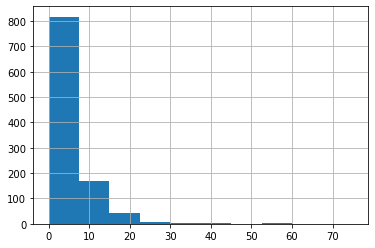

In [10]:
df_new['absences'].hist()

By looking at the previous histogram, we decided to discretize the values of `absebces` as follows:

- `0-10`
- `11-20`
- `21-30`
- `+30`



In [11]:
ordered_labels = ["0-10","11-20", "21-30", "+30"]

df_new['absences'] = pd.cut(x = df_new['absences'], 
                            bins = [np.min(df_new['absences']),10,20,30,np.max(df_new['absences'])], 
                            labels = ordered_labels,
                            right = True,
                            include_lowest = True)

df_new['absences'] = df_new['absences'].astype(str)

Let's observe the distribution of the discretized features represented on histograms and print the new dataset's structure:

<ipython-input-12-8ed060ad9430>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


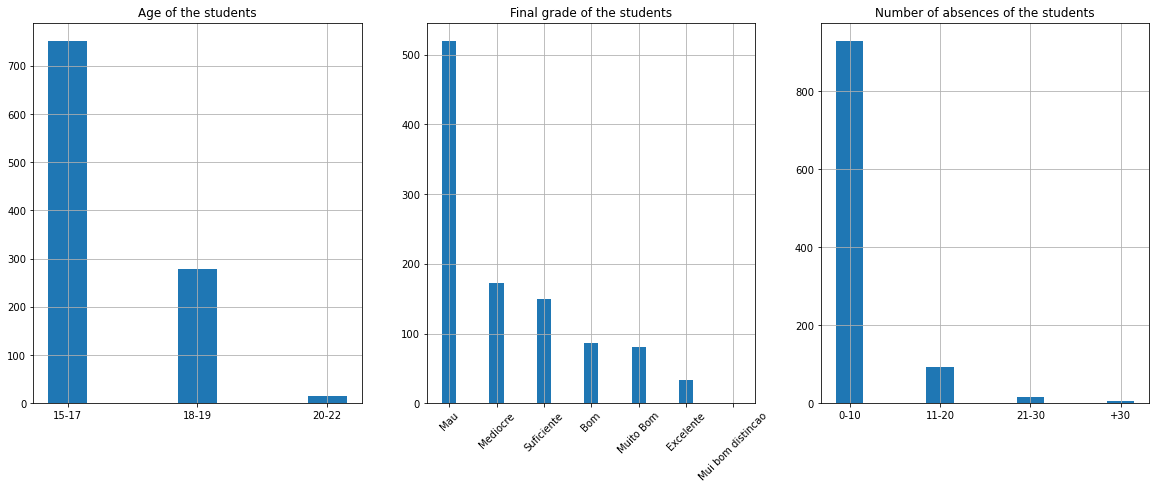

In [12]:
discretized = [df_new['age'], 
               df_new['G3'], 
               df_new['absences']]

titles = ["Age of the students", 
          "Final grade of the students", 
          "Number of absences of the students"]

bins = [["15-17","18-19", "20-22"], 
        ["Mau", "Mediocre",  "Suficiente", "Bom", "Muito Bom", "Excelente", "Mui bom distincao" ],
        ["0-10","11-20", "21-30", "+30"]]

fig, x = plt.subplots(1, len(discretized), figsize=(20, 7))

for i in range(len(x)):
    x[i].bar(bins[i], discretized[i].value_counts(), width = 0.3)
    x[i].grid(True)
    x[i].set_title(titles[i])
    if i == 1:
        _ = plt.setp(x[i].get_xticklabels(), rotation=45)

fig.show()

In [13]:
#Preprocessed dataset's structure info:
print("The preprocessed dataset has the following structure:\n")
print(f"Number of features per individual:\t{len(df_new.columns)}")
print(f"Number of individuals in the dataset:\t{len(df_new)}")
print(f"\nColumns names:\n")

for i in range(len(df_new.columns)):
    print(f"{i}. {df_new.columns[i]}")

print("\nRepresentation of the first five individuals of the dataset:")
df_new.head()

The preprocessed dataset has the following structure:

Number of features per individual:	17
Number of individuals in the dataset:	1044

Columns names:

0. sex
1. age
2. Pstatus
3. Medu
4. Fedu
5. traveltime
6. studytime
7. failures
8. schoolsup
9. famsup
10. paid
11. famrel
12. freetime
13. Dalc
14. health
15. absences
16. G3

Representation of the first five individuals of the dataset:


,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,famrel,freetime,Dalc,health,absences,G3
0,F,18-19,A,4,4,2,2,0,yes,no,no,4,3,1,3,0-10,Mau
1,F,15-17,T,1,1,1,2,0,no,yes,no,5,3,1,3,0-10,Mau
2,F,15-17,T,1,1,1,2,3,yes,no,yes,4,3,2,3,0-10,Suficiente
3,F,15-17,T,4,2,1,3,0,no,yes,yes,3,2,1,5,0-10,Bom
4,F,15-17,T,3,3,1,2,0,no,yes,yes,4,3,1,5,0-10,Suficiente


## 2. Data Exploration 

<p id="data_exploration"></p>

In order to build our Bayesian Network, we must analyze the relationships between each pair of features. In this way, we are able to build a good Bayesian model and formulate correct inferences. 

Let's now have a look at the attributes that, in our opinion, have high influence on others:

### 2.1. Pstatus $\rightarrow$ famrel

In our opinion, the fact that parents are together or apart affects the relation with their son/daughter.  

<AxesSubplot:title={'center':'Normalized Countplot'}, xlabel='Pstatus', ylabel='percentage'>

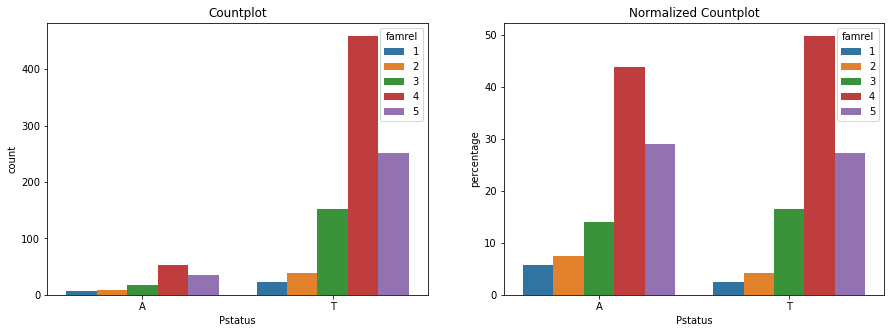

In [14]:
#parameters
a,b = 'Pstatus', 'famrel'
a_order = ['A','T']

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b, 
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True


#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b, 
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

Unexpectedly, the countplot shows that `famrel` has minimal changes on its trend when `Pstatus` varies. As a matter of fact, we can see that parents that are apart might still have a good family relationship with their son/daughter, meaning that:

**<div align="center">`Pstatus` does not influence `famrel`.</div>**

### 2.2. famrel $\rightarrow$ famsup
Intuitively, if a student has a good relationship with his parents, he will more likely be academically supported. 

<AxesSubplot:title={'center':'Normalized Countplot'}, xlabel='famrel', ylabel='percentage'>

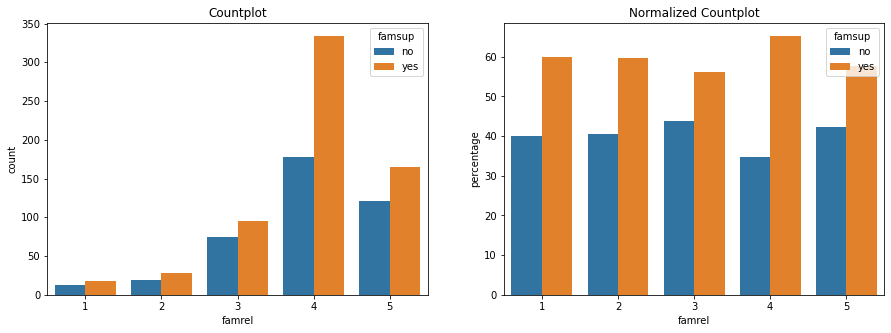

In [15]:
#parameters
a,b = 'famrel', 'famsup'
a_order = [1,2,3,4,5]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b, 
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True


#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b, 
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

In the previous plot we can see that `famrel` has minimal changes on its trend when `famsup` varies. The only case where the trend is slightly different from the others is for `famrel = 4`, indeed in this case the gap between the two coloumns is a little bit higher. In conclusion, we can say that having a good family relationship does not really imply that a student will be supported academically by his parents: 

**<div align="center">`famrel` does not influence `famsup`.</div>**

### 2.3. Medu/Fedu $\rightarrow$ famsup 

<p id="famsup_block"></p>

Mother's level of education should influence the family support value.

<AxesSubplot:title={'center':'Normalized Countplot'}, xlabel='Medu', ylabel='percentage'>

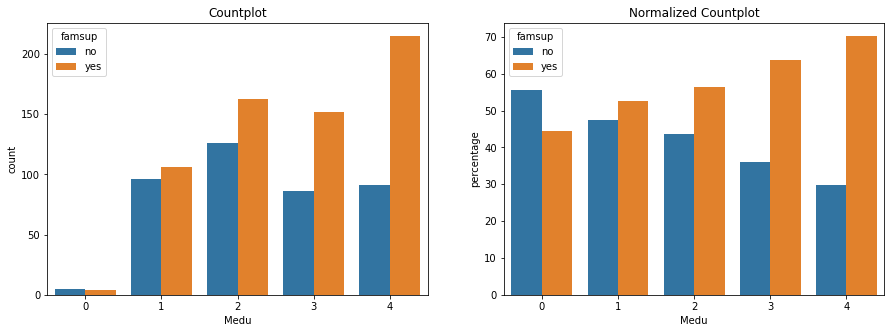

In [16]:
#parameters
a,b = 'Medu', 'famsup'
a_order = [0,1,2,3,4]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b, 
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True


#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

As expected, higher is the mother's level of education, more likely `famsup` is equal to *'yes'*. 
This previous point is valid also for the father's level of education meaning that:

**<div align="center">`Medu` and `Fedu` both influence `famsup`.</div>**

### 2.4. famsup $\rightarrow$ paid 
A student that has family support in his academic carreer, morelikely will go to extra paid lessons.  

<AxesSubplot:title={'center':'Normalized Countplot'}, xlabel='famsup', ylabel='percentage'>

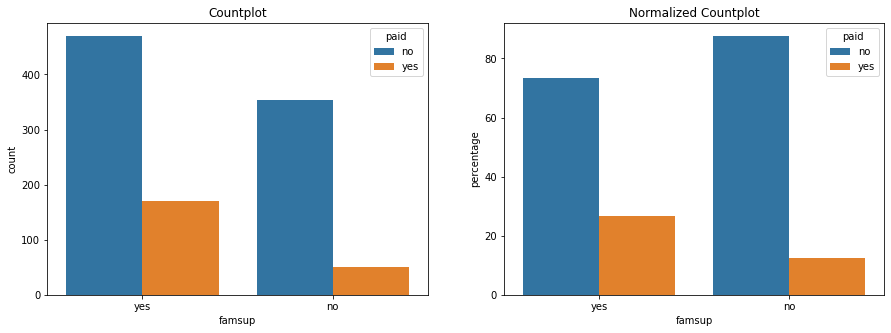

In [17]:
#parameters
a,b = 'famsup', 'paid'
a_order = ['yes', 'no']

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b, 
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True


#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

The countplot shows that there is a slightly higher chance that a student attends extra paid lesson if his academic career is supported by his family, meaning that:

**<div align="center">`famsup` influences `paid`.</div>**

### 2.5. famsup $\rightarrow$ studytime 

<p id="studytime_block"></p>

Parents that support their son's/daughter's academic career are more likely to influence the amount of studytime of their children.

<AxesSubplot:title={'center':'Normalized Countplot'}, xlabel='famsup', ylabel='percentage'>

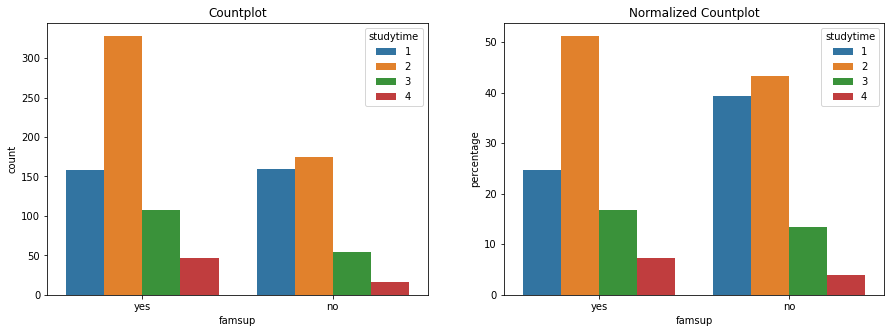

In [18]:
#parameters
a,b = 'famsup', 'studytime'
a_order = ['yes','no']

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b, 
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True


#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

The countplot shows that `studytime` varies its trend while changing `famsup`. As a matter of fact, if `famsup = 'yes'` the gap between the orange bar and the blu bar is much bigger than in the case of `famsup = 'no'`. This means that not receiving parental academic support implies a greater occurrence of students who study for a shorter amount of time. For this reason we can say that:

**<div align="center">`famsup` influences `studytime`.</div>**

### 2.6. Dalc $\rightarrow$ studytime 

Workday alcohol consumption should negatively affect the amount of studytime. Let's see if the data confirms this trend.

<AxesSubplot:title={'center':'Normalized Countplot'}, xlabel='Dalc', ylabel='percentage'>

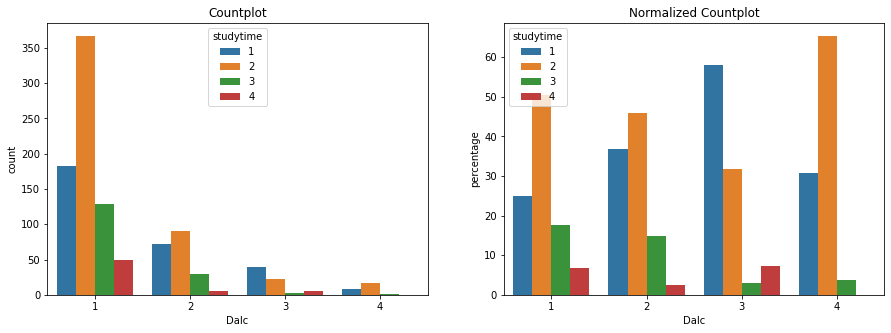

In [19]:
#parameters
a,b = 'Dalc', 'studytime'
a_order = [1,2,3,4]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b, 
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True


#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

In the previous countplot we can see that the higher is the workday alcohol consumption, approximately the less studytime there will be, meaning that:

**<div align="center">`Dalc` influences `studytime`.</div>**

### 2.7. traveltime $\rightarrow$ studytime 

The time it takes to go to school should affect the amount of studytime of the students.

<AxesSubplot:title={'center':'Normalized Countplot'}, xlabel='traveltime', ylabel='percentage'>

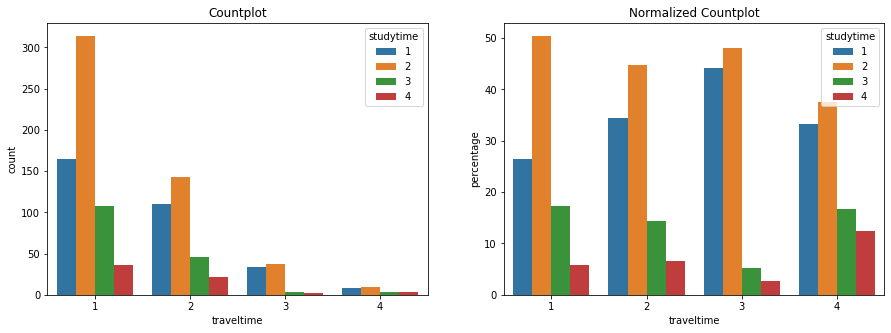

In [20]:
#parameters
a,b = 'traveltime', 'studytime'
a_order = [1,2,3,4]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b, 
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True


#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

As we can see from the countplot, if `traveltime` is high, `studytime` is more likely equal to `1` or `2`, meaning that if the students waste a lot of time in traveling back and forth to school, they may have less time left to study. For this reasons we can say that:

**<div align="center">`traveltime` influences `studytime`.</div>**

### 2.8. freetime $\rightarrow$ studytime 

For the same reasons above, students that have a lot of freetime might study more than student's with a little amount of freetime.

<AxesSubplot:title={'center':'Normalized Countplot'}, xlabel='freetime', ylabel='percentage'>

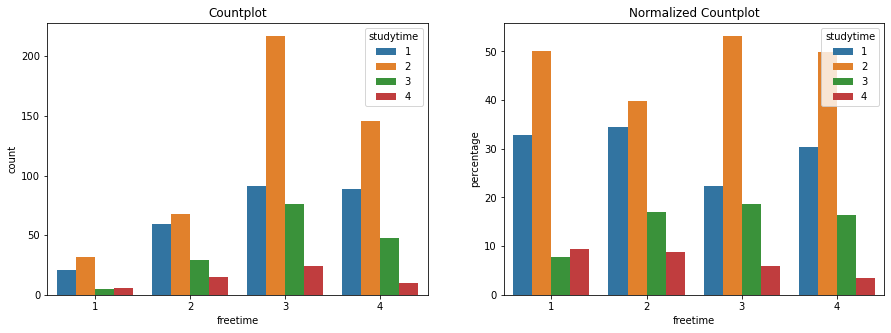

In [21]:
#parameters
a,b = 'freetime', 'studytime'
a_order = [1,2,3,4]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b, 
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True


#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

As we can see from the countplot, higher `freetime` values correspond to a slightly higher number of `studytime = 2` and `studytime = 3` occurrences. For this reasons we can say that:

**<div align="center">`freetime` influences `studytime`.</div>**

### 2.9. health $\rightarrow$ studytime 

Students' health conditions should affect their studytime, as a matter of fact, if a student has severe health problems, unfortunately he might not be in the conditions to study.  

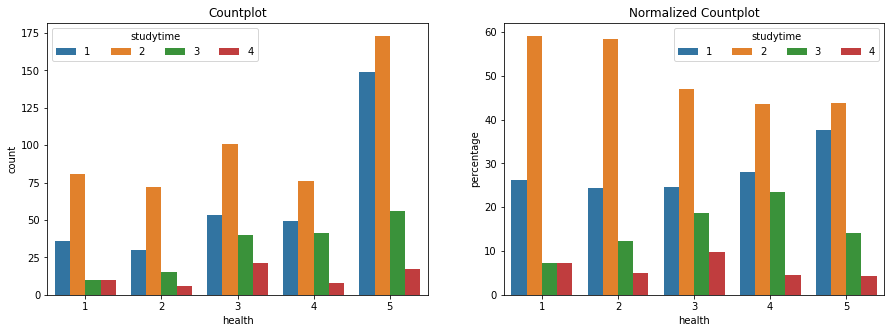

In [22]:
#parameters
a,b = 'health', 'studytime'
a_order = [1,2,3,4,5]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b, 
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True
ax[0].legend(title='studytime', ncol = 4)

#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

ax[1].legend(title='studytime', ncol = 4)

This plot is a little particular. Specifically, we can see that if a student's health conditions are very bad, `studytime = 2` has still a lot of occurences, meaning that even though the health conditions are not good, a high percentage of students will still manage to study for 2-5 hours per week. Instead, if we consider `studytime = 3`, we can notice that the better the health conditions are, the higher will be the percentage of students that study 5-10 hours per week. But also, if we consider `studytime = 1`, we observe that better health conditions correspond to more occurrences of students that study less than 2 hours per week. For this previous reasons, we can say that:   

**<div align="center">`health` does not influences `studytime`.</div>**

### 2.10. schoolsup $\rightarrow$ studytime 

Intuitively, `schoolsup` should affect the amount of studytime, because students that are supported by their school might be highly motivated to succed in their classes. 

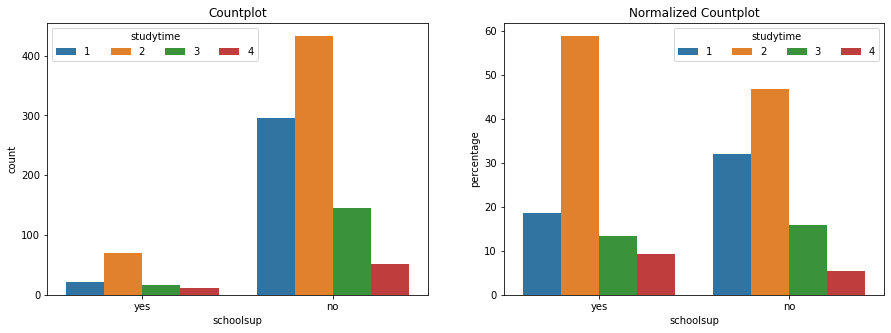

In [23]:
#parameters
a,b = 'schoolsup', 'studytime'
a_order = ["yes", "no"]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b, 
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True
ax[0].legend(title='studytime', ncol = 4)

#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

ax[1].legend(title='studytime', ncol = 4)

From the previous plot, we can comprehend that, without the support of their school, students study less hours than
the students that receive school support, as we can see that `studytime = 1` is much higher in the case of `schoolsup = no` and inversively much lower when `schoolsup = yes`. For these previous reasons:

**<div align="center">`schoolsup` influences `studytime`.</div>**

### 2.11. age $\rightarrow$ G3

<p id="G3_block"></p>

The students' age may affect their final grade because of the fact that we discretized in three ranges of age, separating students that never failed from students that failed one or more times.

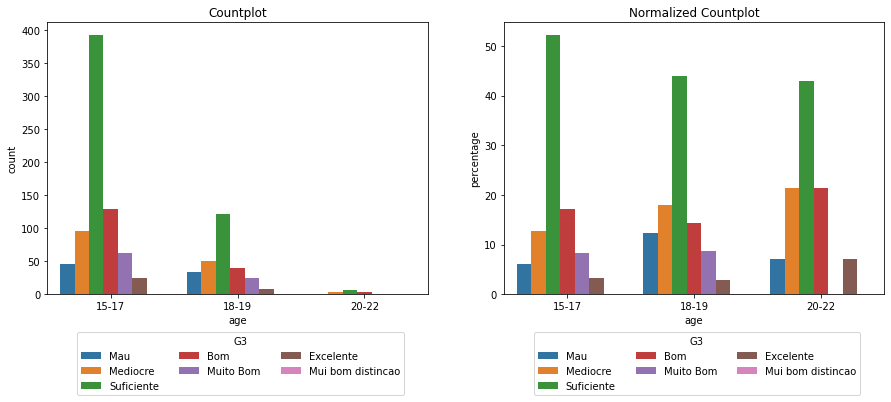

In [24]:
#parameters
a,b = 'age', 'G3'
a_order = ["15-17","18-19", "20-22"]
hue_order = ["Mau",
             "Mediocre", 
             "Suficiente",
             "Bom",
             "Muito Bom",
             "Excelente",
             "Mui bom distincao"]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b, 
              order = a_order,
              hue_order = hue_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True
ax[0].legend(title='G3', ncol=3, bbox_to_anchor = (0.95, -0.12))


#normalized countplot:
occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            order = a_order,
            hue_order = hue_order,
            data = occupation_counts, 
            ax = ax[1])

ax[1].set_title("Normalized Countplot")
ax[1].grid = True
ax[1].legend(title='G3', ncol=3, bbox_to_anchor = (0.95, -0.12))

Approximately, we can say that the higher it gets the students' range of age, the higher is the amount of occurrencies of not sufficient final grades and oppositely the amount of occurrencies of sufficient grades decreases. For this reason we can say that:

**<div align="center">`age` influences `G3`.</div>**

### 2.12. sex $\rightarrow$ G3 

Let's check if the sex of a student affects the final grade.

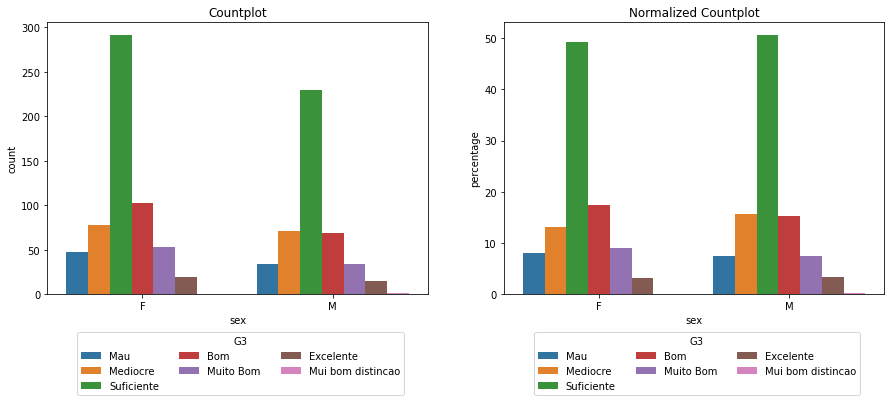

In [25]:
#parameters
a,b = 'sex', 'G3'
a_order = ["F", "M"]
hue_order = ["Mau",
             "Mediocre", 
             "Suficiente",
             "Bom",
             "Muito Bom",
             "Excelente",
             "Mui bom distincao"]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b,
              hue_order = hue_order,
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True
ax[0].legend(title='G3', ncol=3, bbox_to_anchor = (0.95, -0.12))

#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            hue_order = hue_order,
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

ax[1].legend(title='G3', ncol=3, bbox_to_anchor = (0.95, -0.12))

From the previous countplot, we can observe that female students are slightly more likely prone to get higher grades than male students. As a matter of fact, if we consider grades below *sufficient* there are more male occurrencies; oppositely for grades higher that *sufficient* there are more female occurrencies;
The previous points show that:

**<div align="center">`sex` affects `G3`.</div>**

### 2.13. absences $\rightarrow$ G3

The number of absences may influence the students' final grade. 

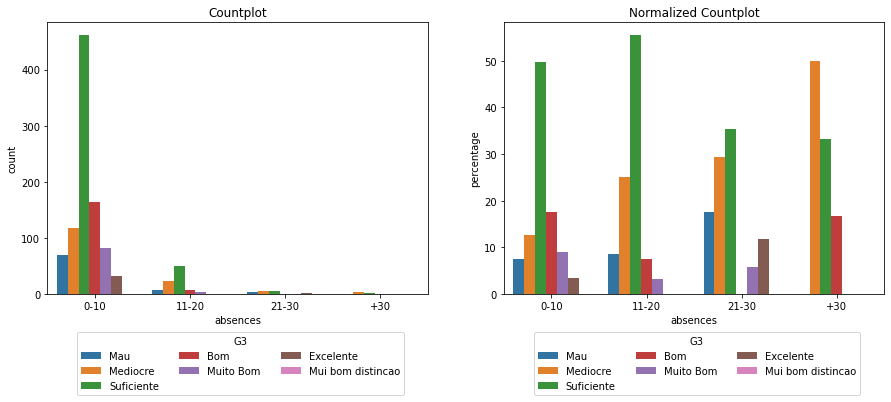

In [26]:
#parameters
a,b = 'absences', 'G3'
a_order = ["0-10","11-20", "21-30", "+30"]
hue_order = ["Mau",
             "Mediocre", 
             "Suficiente",
             "Bom",
             "Muito Bom",
             "Excelente",
             "Mui bom distincao"]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b,
              hue_order = hue_order,
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True
ax[0].legend(title='G3', ncol=3, bbox_to_anchor = (0.95, -0.12))

#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            hue_order = hue_order,
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

ax[1].legend(title='G3', ncol=3, bbox_to_anchor = (0.95, -0.12))

As we can see, if the number of a student's absences gets high, the number of occurrencies of the grades below `suficiente` also gets higher. For this reason we can say that:

**<div align="center">`absences` influences `G3`.</div>**

### 2.14. paid $\rightarrow$ G3
Students that attended extra paid classes might get a higher final grade.

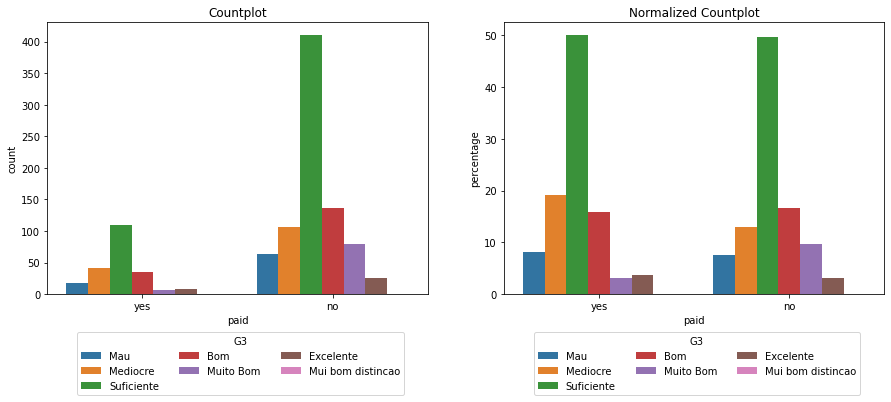

In [27]:
#parameters
a,b = 'paid', 'G3'
a_order = ["yes","no"]
hue_order = ["Mau",
             "Mediocre", 
             "Suficiente",
             "Bom",
             "Muito Bom",
             "Excelente",
             "Mui bom distincao"]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b,
              hue_order = hue_order,
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True
ax[0].legend(title='G3', ncol=3, bbox_to_anchor = (0.95, -0.12))

#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            hue_order = hue_order,
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

ax[1].legend(title='G3', ncol=3, bbox_to_anchor = (0.95, -0.12))

Oppositely from what we expected, the students' paid lessons do not affect their final grade:

**<div align="center">`paid` does not influences `G3`.</div>**

### 2.15. famsup $\rightarrow$ G3 
A student that has a good academic support from his parents, might study with greater commitment, resulting in a better final grade. 

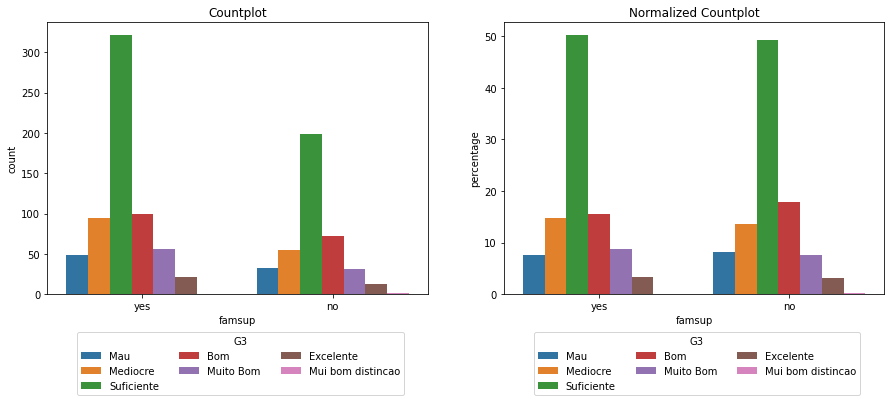

In [28]:
#parameters
a,b = 'famsup', 'G3'
a_order = ['yes','no']
hue_order = ["Mau",
             "Mediocre", 
             "Suficiente",
             "Bom",
             "Muito Bom",
             "Excelente",
             "Mui bom distincao"]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b,
              hue_order = hue_order,
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True
ax[0].legend(title='G3', ncol=3, bbox_to_anchor = (0.95, -0.12))

#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            hue_order = hue_order,
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

ax[1].legend(title='G3', ncol=3, bbox_to_anchor = (0.95, -0.12))

Also in this case we can observe that `famsup` doesn't really affect `G3`:

**<div align="center">`famsup` does not influences `G3`.</div>**

### 2.16. studytime $\rightarrow$ G3

The amount of studytime of a student should positively affect his final grade. 

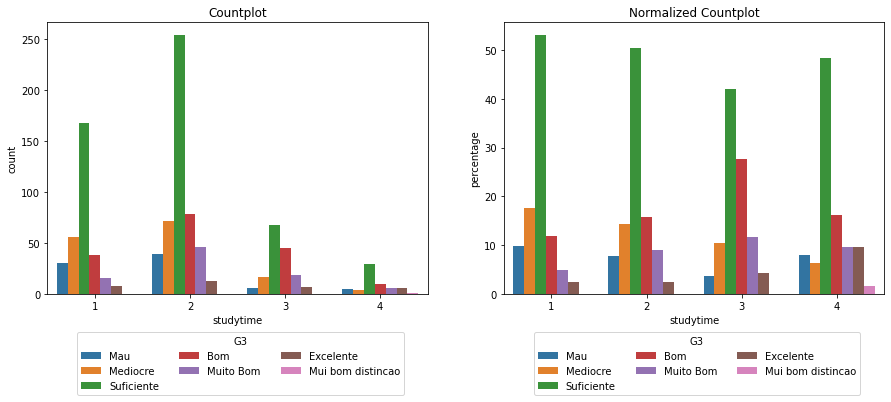

In [29]:
#parameters
a,b = 'studytime', 'G3'
a_order = [1,2,3,4]
hue_order = ["Mau",
             "Mediocre", 
             "Suficiente",
             "Bom",
             "Muito Bom",
             "Excelente",
             "Mui bom distincao"]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#countplot:
sns.countplot(data = df_new,
              x = a,
              hue = b,
              hue_order = hue_order,
              order = a_order,
              ax = ax[0])

ax[0].set_title("Countplot")
ax[0].grid = True
ax[0].legend(title='G3', ncol=3, bbox_to_anchor = (0.95, -0.12))

#normalized countplot:
ax[1].set_title("Normalized Countplot")
ax[1].grid = True

occupation_counts = (df_new.groupby([a])[b]
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(b))

sns.barplot(x = a, 
            y = "percentage", 
            hue = b,
            hue_order = hue_order,
            order = a_order,
            data = occupation_counts, 
            ax = ax[1])

ax[1].legend(title='G3', ncol=3, bbox_to_anchor = (0.95, -0.12))

By looking at the previous countplot, we can clearly observe that students that study for a longer amount of time obtain higher grades and oppositely students that study less obtain lower grades. For this reason we can say that:

**<div align="center">`studytime` influences `G3`.</div>**

Taking into account all of the previous considerations, we decided to drop the following features from the dataset:

- `Pstatus`
- `famrel`
- `health`

In [30]:
df_new = df_new.drop(['Pstatus', 'famrel', 'health'], axis=1)
df_new.head()

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,freetime,Dalc,absences,G3
0,F,18-19,4,4,2,2,0,yes,no,no,3,1,0-10,Mau
1,F,15-17,1,1,1,2,0,no,yes,no,3,1,0-10,Mau
2,F,15-17,1,1,1,2,3,yes,no,yes,3,2,0-10,Suficiente
3,F,15-17,4,2,1,3,0,no,yes,yes,2,1,0-10,Bom
4,F,15-17,3,3,1,2,0,no,yes,yes,3,1,0-10,Suficiente


## 3. Bayesian Network Implementation and Analysis

With all of the considerations made in the previous section, we are now able to build the network and analyse closely the nodes' relationships.

Let's start creating the network by defining the building blocks which will later be merged.

### 3.1. The `famsup` block

In <a href="#famsup_block">*section 2.3. and 2.4*</a> we found out that:

- `Medu` and `Fedu` both infuence `famsup`;


- `famsup` influences `paid`.

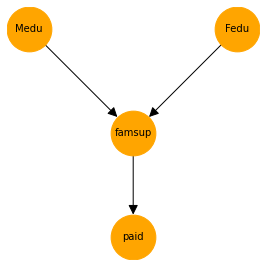

In [31]:
#----------Definition of the building block----------

block1 = BayesianNetwork([
                         ('Medu','famsup'),
                         ('Fedu','famsup'),
                         ('famsup', 'paid')
                       ])

#--------Representation of the building block--------

#Nodes Coordinates:
pos1 = {"Medu":  (0,2),
      "Fedu":   (2,2), 
      "famsup": (1,1),  
      "paid":   (1,0),  
      }

#Options:
options1 = {
    'node_size': 2000,
    'width': 1,
    'arrowsize': 20,
    'font_size': 10
}     
        
plt.figure(figsize=(3.5, 3.5))
nx.draw(block1, pos=pos1, node_color="orange", with_labels=True, **options1)

By observing the above graph, we can spot two different types of dependencies:

#### V-Structure (common cause)

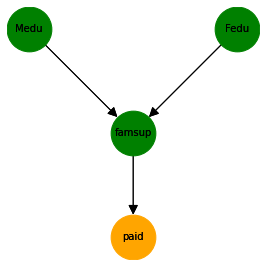

In [32]:
plt.figure(figsize=(3.5, 3.5))

nx.draw(block1, pos=pos1, nodelist=['Medu', 'Fedu', 'famsup'], node_color="green", with_labels=True, **options1)
nx.draw(block1, pos=pos1, nodelist=['paid'], node_color="orange", with_labels=True, **options1)

The green nodes form a ***v-structure***, so we can say that `Medu` and `Fedu` are statistically independent if `famsup` is unobserved, but in the case `famsup` is observed, we have that `Medu`and `Fedu` are statistically dependent. 

Also, with *v-structures*, we say that the two-edge trail X $\rightarrow$ Z $\leftarrow$ Y is active if X $\not \perp$ Y $|$ Z. 

|Dependencies||two-edge trail type|
|:-------------||:--------------|
|`Medu` $\not \perp$ `Fedu` $|$ `famsup`||*active two-edge trail*|
|`Medu` $\perp$ `Fedu`||*inactive two-edge trail*|

#### Causal Trail

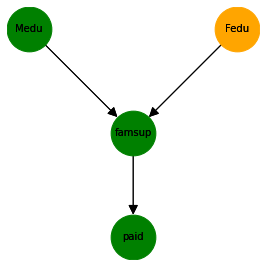

In [33]:
plt.figure(figsize=(3.5, 3.5))

nx.draw(block1, pos=pos1, nodelist=['Medu','famsup', 'paid'], node_color="green", with_labels=True, **options1)
nx.draw(block1, pos=pos1, nodelist=['Fedu'], node_color="orange", with_labels=True, **options1)

The above updated green nodes form a ***causal trail***, meaning that if `famsup` is observed then `Medu` and `paid` are statistically independent; contrarily if `famsup` is not observed then `Medu` and `paid` are statistically dependent. 

Also, with causal trails we say that the two-edge trail X $\rightarrow$ Z $\rightarrow$ Y is active if X $\not \perp$ Y. 

The same conclusions are valid  if we consider `Fedu` instead of `Medu`:

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`Medu` $\perp$ `paid` $|$ `famsup`||*inactive two-edge trail*|
|`Medu` $\not\perp$ `paid`||*active two-edge trail*|
|`Fedu` $\perp$ `paid` $|$ `famsup`||*inactive two-edge trail*|
|`Fedu` $\not\perp$ `paid`||*active two-edge trail*|

### 3.2. The `studytime` block

In <a href="#studytime_block">*section 2.5, 2.6, 2.7, 2.8*</a> we found out that`famsup`, `Dalc`, `traveltime` and `freetime` all infuence `studytime`.

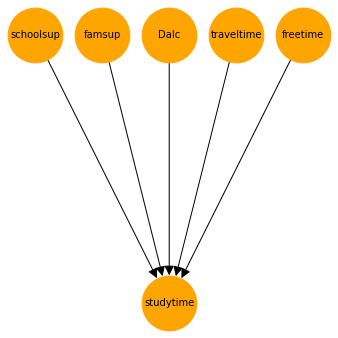

In [34]:
#----------Definition of the building block----------

block2 = BayesianNetwork([
                         ('schoolsup','studytime'),
                         ('famsup','studytime'),
                         ('Dalc','studytime'),
                         ('traveltime', 'studytime'),
                         ('freetime', 'studytime')
                       ])

#--------Representation of the building block--------

#Nodes Coordinates:
pos2 = {'schoolsup' : (0,1),
       'famsup' : (1,1),
       'studytime' : (2,0),     
       'Dalc' : (2,1),  
       'traveltime' : (3,1),  
       'freetime' : (4,1)
      }

#Options:
options2 = {
    'node_size': 3000,
    'width': 1,
    'arrowsize': 20,
    'font_size': 10
}     
        
plt.figure(figsize=(4.5, 4.5))
nx.draw(block2, pos=pos2, node_color="orange", with_labels=True, **options2)

In the above graph, there are only ***v-structures*** as all of the nodes point towards `studytime`. Because of this, we can conclude the following:

<br>

* `schoolsup` $\rightarrow$ `studytime` $\leftarrow$ `famsup`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`schoolsup` $\perp$ `famsup`||*inactive two-edge trail*|
|`schoolsup` $\not \perp$ `famsup` $|$ `studytime`||(*active two-edge trail*)|

<br>

* `schoolsup` $\rightarrow$ `studytime` $\leftarrow$ `Dalc`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`schoolsup` $\perp$ `Dalc`||*inactive two-edge trail*|
|`schoolsup` $\not \perp$ `Dalc` $|$ `studytime`||*active two-edge trail*|

<br>

* `schoolsup` $\rightarrow$ `studytime` $\leftarrow$ `traveltime`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`schoolsup` $\perp$ `traveltime`||*inactive two-edge trail*|
|`schoolsup` $\not \perp$ `traveltime` $|$ `studytime`||*active two-edge trail*|

<br>

* `schoolsup` $\rightarrow$ `studytime` $\leftarrow$ `freetime`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`schoolsup` $\perp$ `freetime`||*inactive two-edge trail*|
|`schoolsup` $\not \perp$ `freetime` $|$ `studytime`||*active two-edge trail*|


<br>

* `famsup` $\rightarrow$ `studytime` $\leftarrow$ `Dalc`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`famsup` $\perp$ `Dalc`||*inactive two-edge trail*|
|`famsup` $\not \perp$ `Dalc` $|$ `studytime`||*active two-edge trail*|

<br>

* `famsup` $\rightarrow$ `studytime` $\leftarrow$ `traveltime`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`famsup` $\perp$ `traveltime`||*inactive two-edge trail*|
|`famsup` $\not \perp$ `traveltime`  $|$ `studytime`||*active two-edge trail*|

<br>

* `famsup` $\rightarrow$ `studytime` $\leftarrow$ `freetime`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`famsup` $\perp$ `freetime`||*inactive two-edge trail*|
|`famsup` $\not \perp$ `freetime` $|$ `studytime`||*active two-edge trail*|

<br>

* `Dalc` $\rightarrow$ `studytime` $\leftarrow$ `traveltime`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`Dalc` $\perp$ `traveltime`||*inactive two-edge trail*|
|`Dalc` $\not\perp$ `traveltime` $|$ `studytime`||*active two-edge trail*|

<br>

* `Dalc` $\rightarrow$ `studytime` $\leftarrow$ `freetime`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`Dalc` $\perp$ `freetime`||*inactive two-edge trail*|
|`Dalc` $\not\perp$ `freetime` $|$ `studytime`||*active two-edge trail*|

<br>

* `traveltime` $\rightarrow$ `studytime` $\leftarrow$ `freetime`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`traveltime` $\perp$ `freetime`||*inactive two-edge trail*|
|`traveltime` $\not\perp$ `freetime` $|$ `studytime`||*active two-edge trail*|

### 3.3. The `G3` block

In <a href="#G3_block">*section 2.11, 2.12, 2.13, 2.14, 2.15, 2.16*</a> we found out that`studytime`, `age`, `sex` and `absences` all infuence `G3`.

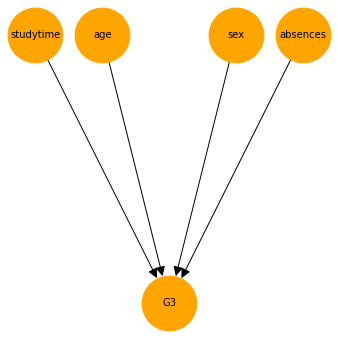

In [35]:
#----------Definition of the building block----------

block3 = BayesianNetwork([
                         ('studytime','G3'),
                         ('age','G3'),
                         ('sex','G3'),
                         ('absences','G3')
                       ])

#--------Representation of the building block--------

#Nodes Coordinates:
pos3 = {'studytime' : (0,1),
       'G3' : (2,0),     
       'age' : (1,1),  
       'sex' : (3,1),  
       'absences' : (4,1),
      }

#Options:
options3 = {
    'node_size': 3000,
    'width': 1,
    'arrowsize': 20,
    'font_size': 10
}     
        
plt.figure(figsize=(4.5, 4.5))
nx.draw(block3, pos=pos3, node_color="orange", with_labels=True, **options3)

Just as it happened earlier, in the above graph there are only ***v-structures***, but differently this time all of the nodes point towards `G3`. Because of this, we can conclude the following:

<br>

* `studytime` $\rightarrow$ `G3` $\leftarrow$ `age`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`studytime` $\perp$ `age`||*inactive two-edge trail*|
|`studytime` $\not \perp$ `age` $|$ `G3`||*active two-edge trail*|

<br>

* `studytime` $\rightarrow$ `G3` $\leftarrow$ `sex`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`studytime` $\perp$ `sex`||*inactive two-edge trail*|
|`studytime` $\not \perp$ `sex`  $|$ `G3`||*active two-edge trail*|

<br>

* `studytime` $\rightarrow$ `G3` $\leftarrow$ `absences`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`studytime` $\perp$ `absences`||*inactive two-edge trail*|
|`studytime` $\not \perp$ `absences` $|$ `G3`||*active two-edge trail*|

<br>

* `age` $\rightarrow$ `G3` $\leftarrow$ `sex`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`age` $\perp$ `sex`||*inactive two-edge trail*|
|`age` $\not\perp$ `sex` $|$ `G3`||*active two-edge trail*|

<br>

* `age` $\rightarrow$ `G3` $\leftarrow$ `absences`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`age` $\perp$ `absences`||*inactive two-edge trail*|
|`age` $\not\perp$ `absences` $|$ `G3`||*active two-edge trail*|

<br>

* `sex` $\rightarrow$ `G3` $\leftarrow$ `absences`

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`sex` $\perp$ `absences`||*inactive two-edge trail*|
|`sex` $\not\perp$ `absences` $|$ `G3`||*active two-edge trail*|

### 3.4. The resulting network
Let's now put all the building blocks together:

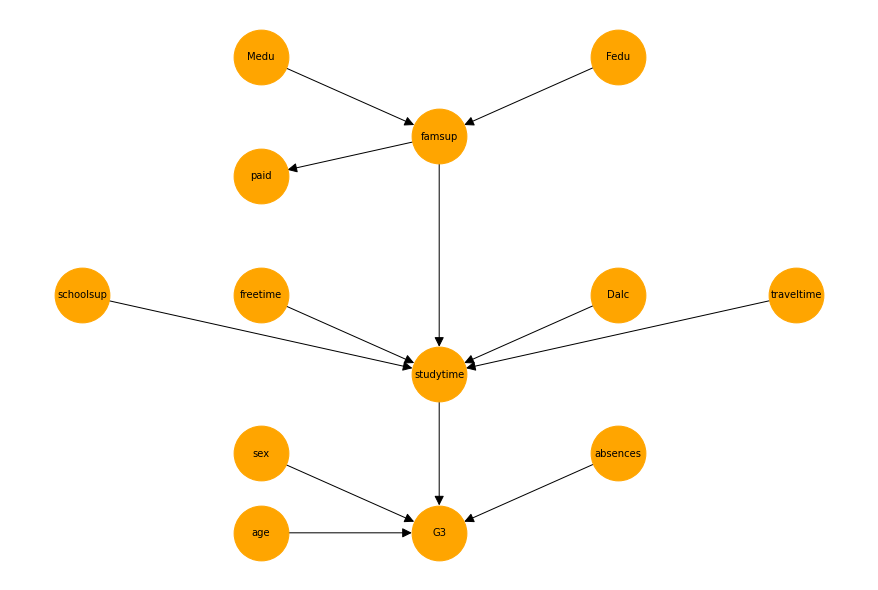

In [36]:
#----------Definition of the Bayesian Network----------

model = BayesianNetwork([
                         #nodes to famsup:
                         ('Medu','famsup'),
                         ('Fedu','famsup'),
    
                         #nodes to studytime:
                         ('schoolsup','studytime'),
                         ('famsup','studytime'),
                         ('Dalc','studytime'),
                         ('traveltime','studytime'),
                         ('freetime','studytime'),
                        
                         #nodes to paid: 
                         ('famsup','paid'),
                        
                         #nodes to G3: 
                         ('sex','G3'),   
                         ('age','G3'),
                         ('studytime','G3'),
                         ('absences','G3'),
                       ])

#--------Representation of the Bayesian Network--------

#Nodes Coordinates:
pos = {"Medu": (4,5),
       "Fedu": (6,5),
       "paid": (4,3.5),
       "famsup": (5,4),
     
       "schoolsup": (3,2),
       "freetime": (4,2),
       "Dalc": (6,2),
       "traveltime": (7,2),  
       "studytime": (5,1),
       
     
       
       "sex": (4,0), 
       "age": (4,-1),  
       "absences": (6,0), 
       "G3": (5,-1)
      }

#Options:
options = {
    'node_size': 3000,
    'width': 1,
    'arrowsize': 20,
    'font_size': 10
}     
        
plt.figure(figsize=(12, 8))
nx.draw(model, pos=pos, node_color="orange", with_labels=True, **options)

The resulting network has new dependencies, most of which are *causal trails* or *v-structures*, but in particular there is an occurrance of a new type of dependency:

#### Common parent

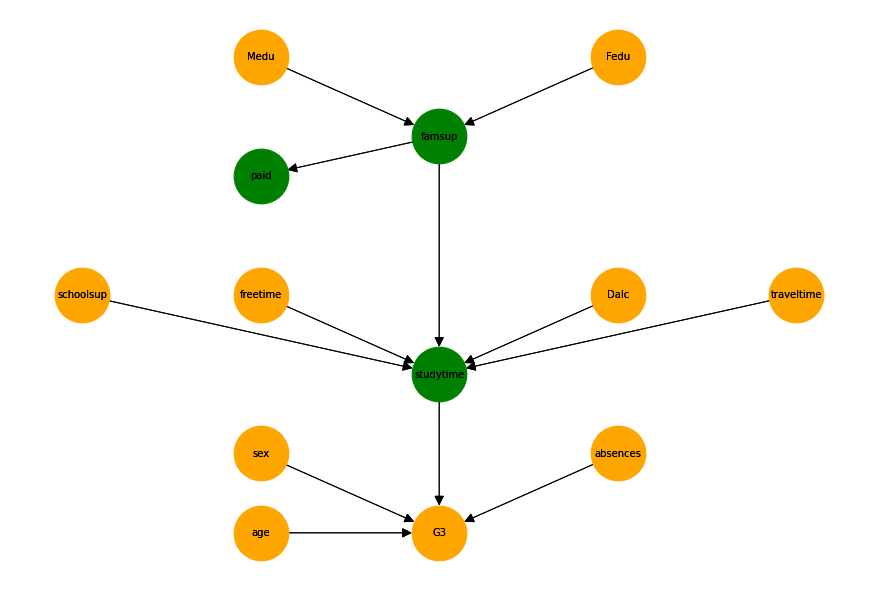

In [37]:
plt.figure(figsize=(12, 8))

nx.draw(model, pos=pos, nodelist=['paid','famsup', 'studytime'], node_color="green", with_labels=True, **options)
nx.draw(model, pos=pos, nodelist=['Medu','Fedu', 'schoolsup', 'freetime', 'Dalc', 'traveltime', 'sex', 'age', 'absences', 'G3'], node_color="orange", with_labels=True, **options)

The above updated green nodes form a ***common parent structure***, meaning that if `famsup` is observed then `paid` and `studytime` are statistically independent; contrarily if `famsup` is not observed then `paid` and `studytime` are statistically dependent. Summarizing we have that:

|Dependencies||two-edge trail type|
|:-------------||--------------:|
|`paid` $\perp$ `studytime` $|$ `famsup`||*active two-edge trail*|
|`paid` $\not\perp$ `studytime`||*inactive two-edge trail*|

### 3.6. Analysis of the resulting network: flow of probabilistic influence
Since the network has been successfully created, let's verify the dependencies analyzed earlier by using the adequate *pgmpy* functions.

#### Active trails
A trail that has more than three edges, is considered ***active*** if all the two-edge trails that compose it are active; one inactive two-edge trail makes the entire trail inactive. 

Let's see how all of the active trails change if variables are observed:

In [38]:
#nodes:

nodes = ['Medu', 
         'Fedu', 
         'famsup', 
         'paid', 
         'schoolsup', 
         'freetime', 
         'Dalc', 
         'traveltime', 
         'studytime', 
         'sex', 
         'age', 
         'G3', 
         'absences']

observed_nodes = ['famsup', 
                  'famsup', 
                  'studytime', 
                  'famsup', 
                  'studytime', 
                  'studytime', 
                  'studytime', 
                  'studytime', 
                  ['famsup', 'G3'],
                  'G3', 
                  'G3', 
                  'studytime', 
                  'G3']

#Active trails:

for i in range(len(nodes)):
    print(f"\n\n- Active trails from node '{nodes[i]}':\n")
    a = model.active_trail_nodes(nodes[i])
    print(f"{a[nodes[i]]}")
    print(f"\n\n- Active trails from node '{nodes[i]}' given that '{observed_nodes[i]}' is observed: ")
    b = model.active_trail_nodes(nodes[i], observed = observed_nodes[i])
    print(f"\n{b[nodes[i]]}\n")
    print("-"*55)



- Active trails from node 'Medu':

{'paid', 'G3', 'studytime', 'Medu', 'famsup'}


- Active trails from node 'Medu' given that 'famsup' is observed: 

{'Medu', 'Fedu'}

-------------------------------------------------------


- Active trails from node 'Fedu':

{'paid', 'G3', 'studytime', 'famsup', 'Fedu'}


- Active trails from node 'Fedu' given that 'famsup' is observed: 

{'Medu', 'Fedu'}

-------------------------------------------------------


- Active trails from node 'famsup':

{'paid', 'G3', 'studytime', 'Medu', 'famsup', 'Fedu'}


- Active trails from node 'famsup' given that 'studytime' is observed: 

{'freetime', 'schoolsup', 'Fedu', 'paid', 'Dalc', 'Medu', 'traveltime', 'famsup'}

-------------------------------------------------------


- Active trails from node 'paid':

{'paid', 'G3', 'studytime', 'Medu', 'famsup', 'Fedu'}


- Active trails from node 'paid' given that 'famsup' is observed: 

{'paid'}

-------------------------------------------------------


- Active t

In the previous code, we defined as `observed_nodes` all of the nodes that theoretically are supposed to make inactive the two-edge active trails and viceversa.  

As we said earlier:

- with *v-structures* X $\rightarrow$ Z $\leftarrow$ Y, X and Y are independent (inactive two-edge trail) only if Z is <u>not</u> given;


- with *causal trails* X $\rightarrow$ Z $\rightarrow$ Y, X and Y are independent (inactive two-edge trail) only if Z is given;


- with *common parent trails* X $\leftarrow$ Z $\rightarrow$ Y, X and Y are independent (inactive two-edge trail) only if Z is given.

Let's consider for example the *active trails* from `schoolsup` from which we can spot both *v-structures* and *causal trails* dependencies:

1. given that `studytime` is <u>not</u> observed, all of the *v-structures* from `schoolsup` are inactive and oppositely the *causal trail* `schoolsup` $\rightarrow$ `studytime` $\rightarrow$ `G3` is active, meaning that:


**<center>If `studytime` is not given, the active nodes are  {'schoolsup', 'studytime', 'G3'}</center>**


2. given that `studytime` is observed, all of the *v-structures* from `schoolsup` are active and the *causal trail* `schoolsup` $\rightarrow$ `studytime` $\rightarrow$ `G3` is not active anymore. Moreover`famsup` is active, so we can consider also the dependencies:

    - `Medu`/`Fedu` $\rightarrow$ `famsup` $\rightarrow$ `paid`/`studytime`, which is active given that `famsup` is not observed;
    
    - `paid` $\leftarrow$ `famsup` $\rightarrow$ `studytime`, which is also active given that `famsup` is not observed. 

So in this case we can state that:

**<center>If `studytime` is given, the active nodes are  {'Dalc', 'traveltime', 'freetime', 'Fedu', 'schoolsup', 'Medu', 'paid', 'famsup'}</center>**

#### D-separability

Two sets of nodes **X**, **Y** are *d-separated* given **Z** if there is *no active trail* between any X ∈ **X** and Y ∈ **Y** given **Z**. 
<br>Considering the same starting node we used above, we expect that all of the nodes which are part of the active trail that contains `schoolsup`, are <u>not</u> *d-separated* and viceversa.
In the following code, we verify whether `schoolsup` is *d-separated* from other nodes in the active trail and from nodes outside of the active trail.

In [39]:
#variables:
active_trail_nodes = ['schoolsup', 
                      'studytime', 
                      'G3']

inactive_trail_nodes = ['Medu', 
                        'Fedu', 
                        'famsup', 
                        'paid', 
                        'freetime', 
                        'Dalc', 
                        'traveltime', 
                        'sex', 
                        'age', 
                        'absences'
                       ]

#check if schoolsup and the rest of active trail nodes are d-connected:

bool_vect1 = []

for i in range(len(active_trail_nodes)):
    
    bool_vect1.append(model.is_dconnected('schoolsup', active_trail_nodes[i]))
    
#che if schoolsup and the inactive trail nodes are d-connected:

bool_vect2 = []

for i in range(len(inactive_trail_nodes)):
    
    bool_vect2.append(model.is_dconnected('schoolsup', inactive_trail_nodes[i]))
    

#prints:

if all(bool_vect1):
    print("The nodes in the active trail are all d-connected to 'schoolsup'\n")
    print('-'*60)
    
else:
    print("The nodes in the active trail are NOT all d-connected to 'schoolsup'\n")
    print('-'*60)

if not any(bool_vect2):
    print("\nThe nodes that are not part of the active trail are all d-separated from 'schoolsup'\n")
    print('-'*60)
    
else:
    print("the nodes that are not part of the active trail are NOT all d-separated from 'schoolsup'")
    print('-'*60)
    

The nodes in the active trail are all d-connected to 'schoolsup'

------------------------------------------------------------

The nodes that are not part of the active trail are all d-separated from 'schoolsup'

------------------------------------------------------------


Now instead, let's consider only `schoolsup` $\rightarrow$ `studytime` $\rightarrow$ `G3`. 

As we said earlier, these nodes are all part of the active trail, but if `studytime` is observed, we expect that `schoolsup` is now *d-separated* from `G3`.  

In [40]:
if not model.is_dconnected('schoolsup', 'G3', observed=['studytime']):
    print("\n'schoolsup' and 'G3' are d-separated, as we expected.")

else: 
    print("\n'schoolsup' and 'G3' are d-connected, contrarily from what we expected.")


'schoolsup' and 'G3' are d-separated, as we expected.


##### Local independencies

Each node is conditionally independent of its nondescendants given its parents. For example, if we consider `famsup`, we have that given the parents `Medu` and `Fedu`, `famsup` is conditionally independent of all nodes except the descendants `paid` and `studytime`. 

In [41]:
print(f"As we expected, we have:\n\n{model.local_independencies('famsup')}")

As we expected, we have:

(famsup ⟂ Dalc, sex, absences, schoolsup, freetime, age, traveltime | Medu, Fedu)


##### Markov blanket

Each node is conditionally independent of all others given its Markov blanket, which consists of the node's parents, children and children's parents. For example, the Markov blanket of `famsup`, should be composed by:

- parent nodes: `Medu` and `Fedu`;

- children nodes: `paid` and `studytime`;

- children's parent nodes: `schoolsup`, `freetime`, `Dalc` and `traveltime`.

Given the Markov blanket of `famsup`, we expect that `famsup` is conditionally independent of `sex`, `age` , `absences` and `G3`.

The Markov blanket of 'famsup' (green nodes) is:



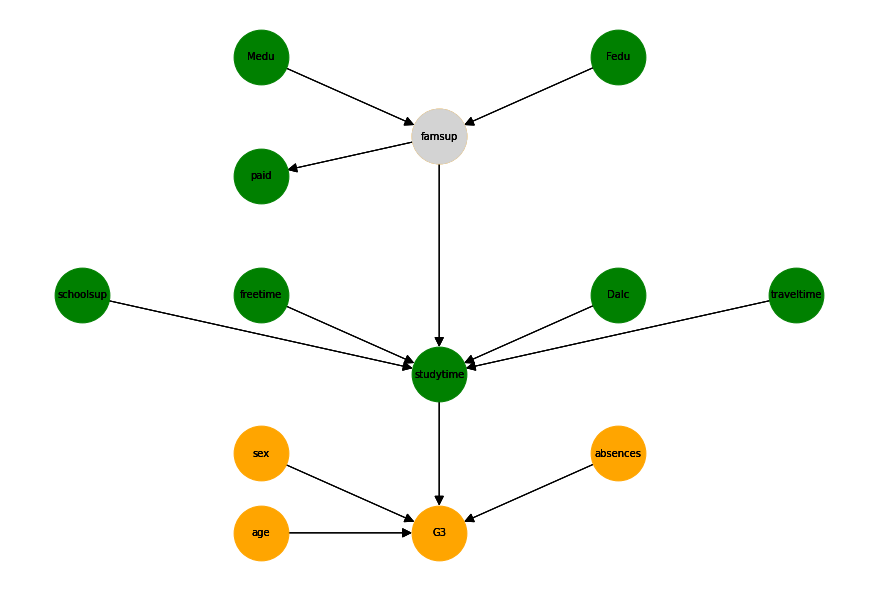

In [42]:
print("The Markov blanket of 'famsup' (green nodes) is:\n")
plt.figure(figsize=(12, 8))


nx.draw(model, 
        pos=pos, 
        nodelist = model.get_markov_blanket('famsup'), 
        node_color="green", 
        with_labels=True, 
        **options)

nx.draw(model, 
        pos=pos, 
        nodelist= (model.nodes() - model.get_markov_blanket('famsup')), 
        node_color="orange", 
        with_labels=True, 
        **options)

nx.draw(model, 
        pos=pos, 
        nodelist = ['famsup'], 
        node_color="lightgray", 
        with_labels=True, 
        **options)

As expected, the Markov blanket of `famsup` is composed by the above green nodes. Given the green nodes, we have that `famsup` is conditionally independent of the yellow nodes. 

##### Irrelevant variables

Given the query $P(X|E)$, we will say that a node $Y$ *is irrelevant to the query* if $Y \not\in AncestralTree(X)$ or if $Y$ is d-separated from $X$ by $E$.
In particular, we define $AncestralTree(X)$ as $Ancestors(\{X\} \cup E)$.

Due to the fact that in *pgmpy* there are no functions able to find irrelevant variables to a given query, we will graphically find the irrelevant variables and we will verify them by checking whether $Y$ is *d-connected* to $X$ by $E$.
<br>


Let's consider the query $P(studytime | freetime)$:

The AncestralTree of 'studytime' (green nodes) is:



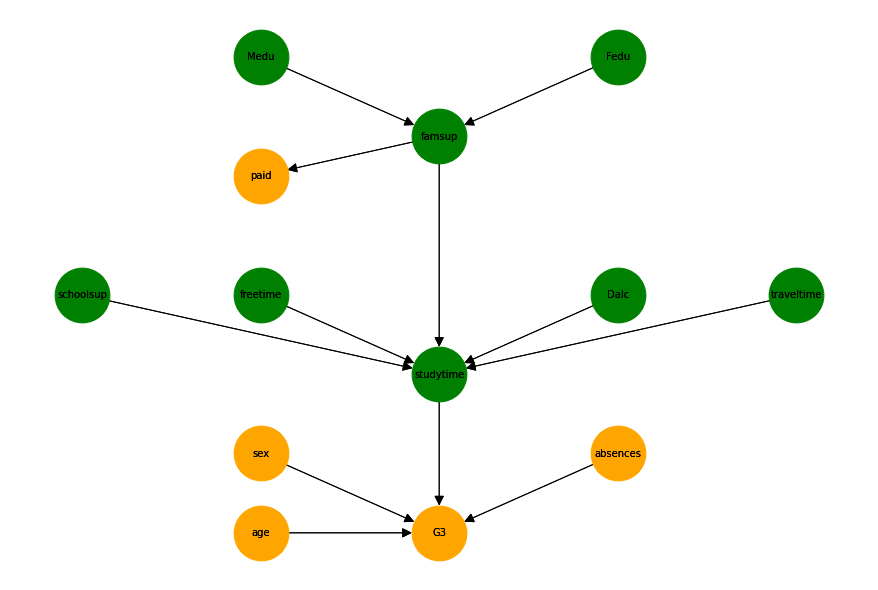

In [43]:
print("The AncestralTree of 'studytime' (green nodes) is:\n")

plt.figure(figsize=(12, 8))

nx.draw(model, 
        pos=pos, 
        nodelist = model.get_ancestral_graph('studytime'), 
        node_color="green", 
        with_labels=True, 
        **options)

nx.draw(model, 
        pos=pos, 
        nodelist= (model.nodes() - model.get_ancestral_graph('studytime')), 
        node_color="orange", 
        with_labels=True, 
        **options)

From the previous plot, we can graphically see that all of the yellow nodes are **irrelevant variables** to the given query. Now let's confirm this by checking whether the yellow variables and `studytime` are *d-separated* or not, given that `famsup` is observed. 

In [44]:
irr_var = list(model.nodes() - model.get_ancestral_graph('studytime'))

print(model.is_dconnected('absences', 'studytime', observed='freetime'))
print(model.is_dconnected('sex', 'studytime', observed='freetime'))
print(model.is_dconnected('age', 'studytime', observed='freetime'))

False
False
False


As we expected, the results are verified.

## 4. Parameter Estimation

Since the bayesian network has been created successfully, we can now proceed estimating the *Conditional Probability Distributions* (**CPDs**).

Parameter learning can be accomplished by using *pgmpy*'s `.fit()` method, which, given a model, a dataframe and an estimator, is able to  
compute the CPDs. 
The two most commonly used estimators are:

- ***Maximum Likelihood Estimator*** (*MLE*), which exploits the relative frequencies of the variables occurrencies to compute the CPDs that maximises $P(data | model)$;


- ***Bayesian Estimator***, which uses already existing prior conditional probability tables in order to compute the CPDs.

We decided to use a Bayesian Estimator, because the dataset we are using comprehends well defined priors which contain relevant insight to the scope of this project work.

Once the *CPDs* have been computed correctly, we can represent them in *Conditional Probability Distributions*.

In [45]:
#Initialize CPDs list:
model.cpds = []


#Estimante parameters:
model.fit(data = df_new,
          estimator = BayesianEstimator,
          prior_type = "BDeu")


#Verify integrity of the CPDs:
if model.check_model():
    print('The CPDs have been computed correctly.\n')
    
    #Represent CPDs in CPTs:
    for cpd in model.get_cpds():
        print(f"Conditional Probability Table of '{cpd.variable}':")
        print(cpd, '\n')
        
else:
    print('Parameter estimation failed to be consistent.\n')

The CPDs have been computed correctly.

Conditional Probability Table of 'Medu':
+---------+------------+
| Medu(0) | 0.00953289 |
+---------+------------+
| Medu(1) | 0.193518   |
+---------+------------+
| Medu(2) | 0.276454   |
+---------+------------+
| Medu(3) | 0.227836   |
+---------+------------+
| Medu(4) | 0.29266    |
+---------+------------+ 

Conditional Probability Table of 'famsup':
+-------------+---------------------+---------+---------+-----+--------------------+---------------------+
| Fedu        | Fedu(0)             | Fedu(0) | Fedu(0) | ... | Fedu(4)            | Fedu(4)             |
+-------------+---------------------+---------+---------+-----+--------------------+---------------------+
| Medu        | Medu(0)             | Medu(1) | Medu(2) | ... | Medu(3)            | Medu(4)             |
+-------------+---------------------+---------+---------+-----+--------------------+---------------------+
| famsup(no)  | 0.08333333333333333 | 0.5     | 0.5     | ... | 

## 5. Inferences

Since the model has been created successfully and the CPDs have been computed correctly, we have finally generated a bayesian network that represents a complex *Joint Probability Function*, to which we can compute inferences that take into account all of the random variables and their possible instances. 

There are two types of bayesian inferences:

1. ***exact inference***, with which we analytically compute the CPDs over some arbitrarily choosen random variables;


2. ***approximate inference***, with which the CPDs are computed exploiting approximation techniques based on statistical sampling.

<br>
<img src="images/graph.png " width="210" align = "right"/>

Also, in bayesian inferences there are different reasoning patterns:



* ***predictive (or causal) reasoning***, when the inference flows from cause to effect, e.g. $P(Y | X_1)$. 
<br>

* ***diagnostic (or evidential) reasoning***, when the inference flows from effect to cause, e.g. $P(X_1 | Y)$.  
<br>

* ***intercausal reasoning***, when the inference flows from a cause to another, both with a common effect, e.g. $P(X_1 | X_2, Y)$ or $P(X_2 | X_1, Y)$. 


<br>
In the following sections, we will see both exact and aproximate inference queries that are based on each of the above reasoning patterns.

### 5.1. Exact Inference
In general, exact inference can be done by *enumeration* or by *variable elimination*. However, inference by enumeration typically is computationally slow, that is the reason why we have choosen the **Variable Elimination algorithm**.

In [46]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)  

In order to represent graphically each query, we implemented the following python functions. 

In [47]:
def plot_pdf(rows, cols, titles, pdf_legends, figsize, x_ticklabels, diz):
    
    #define subplots structure:
    f, ax = plt.subplots(rows, cols, figsize = figsize)    
    
    
    #define axis' labels and values:
    x_axis = np.arange(len(x_ticklabels))
   
    y_labels = []  
    max_height = []
    
    for k in range(len(diz)):
        y_labels.append(diz[k].values())
        
        max_height.append(max(list(diz[k].values())))
    
    max_height = max(max_height)+10                      
    #iteratively create subplots:
    index = 0
    
    if rows == 1:
        for i in range(cols):
            ax[i].bar(x_axis, y_labels[index], tick_label = x_ticklabels, label = pdf_legends[index], width = 0.1)
            ax[i].set_ylim(top=max_height)
            ax[i].grid()
            ax[i].legend()
            ax[i].set_title(titles[index])
            
            index = index + 1
            
    else:        
        for j in range(cols):
            for i in range(rows):
                ax[i,j].bar(x_axis, y_labels[index], tick_label = x_ticklabels, label = pdf_legends[index], width = 0.1)
                ax[i,j].set_ylim(top=max_height)
                ax[i,j].grid()
                ax[i,j].legend()
                ax[i,j].set_title(titles[index])

                index = index + 1
    
    plt.show()

### 5.1.1. Causal Inference Queries

* **What is the probability of each possible instance of <u>Grade</u> given the <u>Age</u> and <u>Sex</u> of the student?**

** First case: 	Age between 15 and 17:



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

- Male students

 +-----------------------+-----------+
| G3                    |   phi(G3) |
+=======================+===========+
| G3(Bom)               |    0.1708 |
+-----------------------+-----------+
| G3(Excelente)         |    0.0492 |
+-----------------------+-----------+
| G3(Mau)               |    0.0516 |
+-----------------------+-----------+
| G3(Mediocre)          |    0.1242 |
+-----------------------+-----------+
| G3(Mui bom distincao) |    0.0092 |
+-----------------------+-----------+
| G3(Muito Bom)         |    0.0856 |
+-----------------------+-----------+
| G3(Suficiente)        |    0.5095 |
+-----------------------+-----------+

- Female students

+-----------------------+-----------+
| G3                    |   phi(G3) |
+=======================+===========+
| G3(Bom)               |    0.1697 |
+-----------------------+-----------+
| G3(Excelente)         |    0.0298 |
+-----------------------+-----------+
| G3(Mau)               |    0.0651 |
+-----------

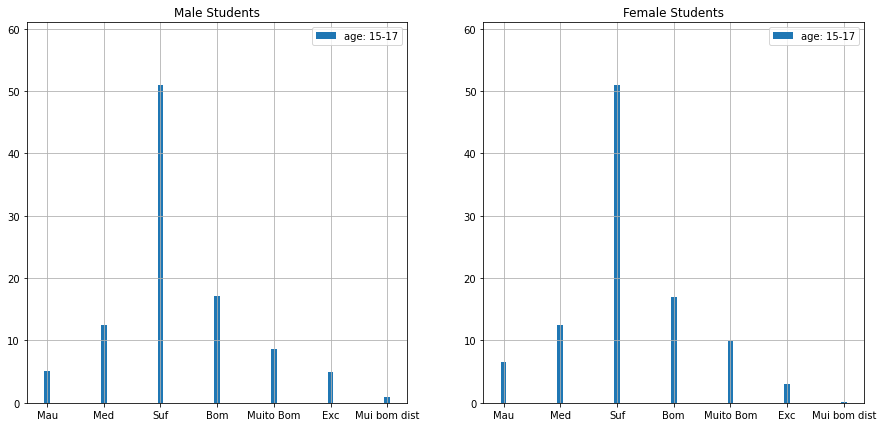

In [48]:
#--------Inference CPT representations--------

print("** First case: \tAge between 15 and 17:\n")


#Inferences:
q1_1 = infer.query(["G3"], evidence = {"sex": 'M',"age": '15-17'})
q1_2 = infer.query(["G3"], evidence = {"sex": 'F',"age": '15-17'})


#Print CPTs:
print(f"- Male students\n\n {q1_1}")
print(f"\n- Female students\n\n{q1_2}")



#------------Plotting the PDFs------------

#x axis ticklabels:
x_ticklabels = ["Mau",
                "Med", 
                "Suf",
                "Bom",
                "Muito Bom",
                "Exc",
                "Mui bom dist"]

#Setting y values of first dictionary:
diz1 = dict({"Bom": q1_1.values[0]*100,
             "Exc": q1_1.values[1]*100,
             "Mau": q1_1.values[2]*100,
             "Med": q1_1.values[3]*100,
             "Mui bom dist": q1_1.values[4]*100,
             "Muito Bom": q1_1.values[5]*100,
             "Suf": q1_1.values[6]*100
            })

#Reordering first dictionary:
diz1 = {k: diz1[k] for k in x_ticklabels}

#Setting y values of second dictionary:
diz2 = dict({"Bom": q1_2.values[0]*100,
             "Exc": q1_2.values[1]*100,
             "Mau": q1_2.values[2]*100,
             "Med": q1_2.values[3]*100,
             "Mui bom dist": q1_2.values[4]*100,
             "Muito Bom": q1_2.values[5]*100,
             "Suf": q1_2.values[6]*100
            })

#Reordering second dictionary:
diz2 = {k: diz2[k] for k in x_ticklabels}

#Variables to plot PDFs:
rows = 1
cols = 2
titles = ["Male Students", "Female Students"]
pdf_legends = ['age: 15-17', 'age: 15-17']
figsize = (15,7)
diz = [diz1, diz2]


#plot all the pdf:
print("\nPDFs in percentage format:")
plot_pdf(rows = rows,
         cols = cols,
         titles = titles,
         pdf_legends = pdf_legends,
         figsize = figsize,
         x_ticklabels = x_ticklabels, 
         diz = diz)

** Second case: 	Age between 18 and 19:



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

- Male students

 +-----------------------+-----------+
| G3                    |   phi(G3) |
+=======================+===========+
| G3(Bom)               |    0.1525 |
+-----------------------+-----------+
| G3(Excelente)         |    0.0169 |
+-----------------------+-----------+
| G3(Mau)               |    0.1289 |
+-----------------------+-----------+
| G3(Mediocre)          |    0.1657 |
+-----------------------+-----------+
| G3(Mui bom distincao) |    0.0060 |
+-----------------------+-----------+
| G3(Muito Bom)         |    0.1099 |
+-----------------------+-----------+
| G3(Suficiente)        |    0.4201 |
+-----------------------+-----------+

- Female students

+-----------------------+-----------+
| G3                    |   phi(G3) |
+=======================+===========+
| G3(Bom)               |    0.1488 |
+-----------------------+-----------+
| G3(Excelente)         |    0.0359 |
+-----------------------+-----------+
| G3(Mau)               |    0.1346 |
+-----------

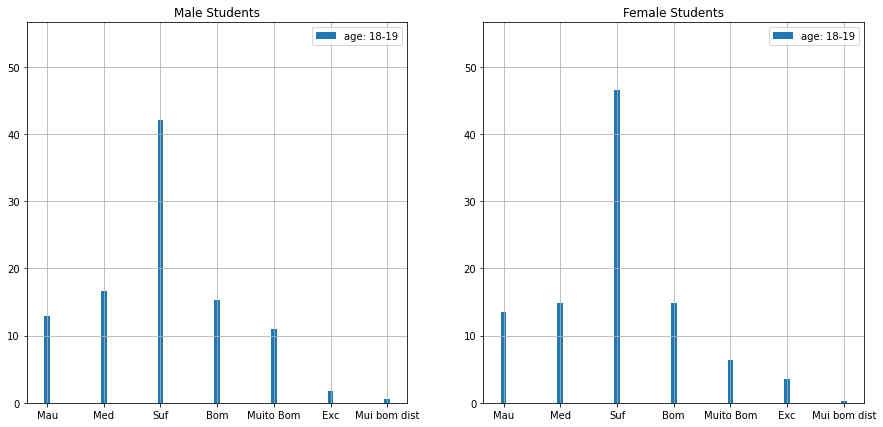

In [49]:
#--------Inference CPT representations--------

print("** Second case: \tAge between 18 and 19:\n")


#Inferences:
q2_1 = infer.query(["G3"],evidence={"sex": 'M',"age": '18-19'})
q2_2 = infer.query(["G3"], evidence = {"sex": 'F',"age": '18-19'})


#Print CPTs:
print(f"- Male students\n\n {q2_1}")
print(f"\n- Female students\n\n{q2_2}")



#------------Plotting the PDFs------------


#x axis ticklabels:
x_ticklabels = ["Mau",
                "Med", 
                "Suf",
                "Bom",
                "Muito Bom",
                "Exc",
                "Mui bom dist"]

#Setting y values of first dictionary:
diz1 = dict({"Bom": q2_1.values[0]*100,
             "Exc": q2_1.values[1]*100,
             "Mau": q2_1.values[2]*100,
             "Med": q2_1.values[3]*100,
             "Mui bom dist": q2_1.values[4]*100,
             "Muito Bom": q2_1.values[5]*100,
             "Suf": q2_1.values[6]*100
            })


#Reordering first dictionary:
diz1 = {k: diz1[k] for k in x_ticklabels}


#Setting y values of second dictionary:
diz2 = dict({"Bom": q2_2.values[0]*100,
             "Exc": q2_2.values[1]*100,
             "Mau": q2_2.values[2]*100,
             "Med": q2_2.values[3]*100,
             "Mui bom dist": q2_2.values[4]*100,
             "Muito Bom": q2_2.values[5]*100,
             "Suf": q2_2.values[6]*100
            })


#Reordering second dictionary:
diz2 = {k: diz2[k] for k in x_ticklabels}


#Variables to plot PDFs:
rows = 1
cols = 2
titles = ["Male Students", "Female Students"]
pdf_legends = ['age: 18-19', 'age: 18-19']
figsize = (15,7)
diz = [diz1, diz2]


#plot all the pdf:
print("\nPDFs in percentage format:")
plot_pdf(rows = rows,
         cols = cols,
         titles = titles,
         pdf_legends = pdf_legends,
         figsize = figsize,
         x_ticklabels = x_ticklabels, 
         diz = diz)

** Third case: 	Age between 20 and 22:



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

- Male students

 +-----------------------+-----------+
| G3                    |   phi(G3) |
+=======================+===========+
| G3(Bom)               |    0.1810 |
+-----------------------+-----------+
| G3(Excelente)         |    0.1810 |
+-----------------------+-----------+
| G3(Mau)               |    0.1045 |
+-----------------------+-----------+
| G3(Mediocre)          |    0.2292 |
+-----------------------+-----------+
| G3(Mui bom distincao) |    0.0960 |
+-----------------------+-----------+
| G3(Muito Bom)         |    0.0960 |
+-----------------------+-----------+
| G3(Suficiente)        |    0.1123 |
+-----------------------+-----------+

- Female students

+-----------------------+-----------+
| G3                    |   phi(G3) |
+=======================+===========+
| G3(Bom)               |    0.1232 |
+-----------------------+-----------+
| G3(Excelente)         |    0.0296 |
+-----------------------+-----------+
| G3(Mau)               |    0.0296 |
+-----------

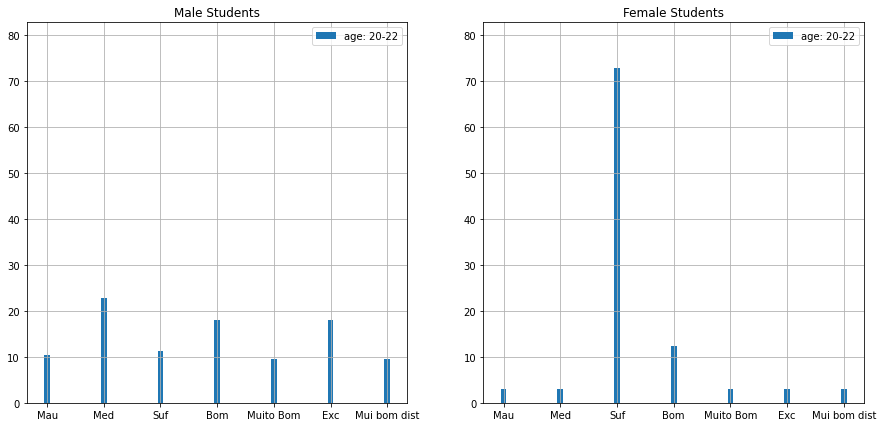

In [50]:
#--------Inference CPT representations--------

print("** Third case: \tAge between 20 and 22:\n")


#Inferences:
q3_1 = infer.query(["G3"],evidence={"sex": 'M',"age": '20-22'})
q3_2 = infer.query(["G3"], evidence = {"sex": 'F',"age": '20-22'})


#Print CPTs:
print(f"- Male students\n\n {q3_1}")
print(f"\n- Female students\n\n{q3_2}")



#------------Plotting the PDFs------------

#x axis ticklabels:
x_ticklabels = ["Mau",
                "Med", 
                "Suf",
                "Bom",
                "Muito Bom",
                "Exc",
                "Mui bom dist"]

#Setting y values of first dictionary:
diz1 = dict({"Bom": q3_1.values[0]*100,
             "Exc": q3_1.values[1]*100,
             "Mau": q3_1.values[2]*100,
             "Med": q3_1.values[3]*100,
             "Mui bom dist": q3_1.values[4]*100,
             "Muito Bom": q3_1.values[5]*100,
             "Suf": q3_1.values[6]*100
            })

#Reordering first dictionary:
diz1 = {k: diz1[k] for k in x_ticklabels}


#Setting y values of second dictionary:
diz2 = dict({"Bom": q3_2.values[0]*100,
             "Exc": q3_2.values[1]*100,
             "Mau": q3_2.values[2]*100,
             "Med": q3_2.values[3]*100,
             "Mui bom dist": q3_2.values[4]*100,
             "Muito Bom": q3_2.values[5]*100,
             "Suf": q3_2.values[6]*100
            })

#Reordering second dictionary:
diz2 = {k: diz2[k] for k in x_ticklabels}

#Variables to plot PDFs:
rows = 1
cols = 2
titles = ["Male Students", "Female Students"]
pdf_legends = ['age: 20-22', 'age: 20-22']
figsize = (15,7)
diz = [diz1, diz2]


#plot all the pdf:
print("\nPDFs in percentage format:")
plot_pdf(rows = rows,
         cols = cols,
         titles = titles,
         pdf_legends = pdf_legends,
         figsize = figsize,
         x_ticklabels = x_ticklabels, 
         diz = diz)

* **What is the probability of all instances of <u>final grade</u> given the amount of <u>studytime</u>?**

** Third case: 	Age between 20 and 22:



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

- CPT of studytime = 1:

 +-----------------------+-----------+
| G3                    |   phi(G3) |
+=======================+===========+
| G3(Bom)               |    0.1199 |
+-----------------------+-----------+
| G3(Excelente)         |    0.0212 |
+-----------------------+-----------+
| G3(Mau)               |    0.0989 |
+-----------------------+-----------+
| G3(Mediocre)          |    0.1601 |
+-----------------------+-----------+
| G3(Mui bom distincao) |    0.0018 |
+-----------------------+-----------+
| G3(Muito Bom)         |    0.0519 |
+-----------------------+-----------+
| G3(Suficiente)        |    0.5462 |
+-----------------------+-----------+

- CPT of studytime = 4:

+-----------------------+-----------+
| G3                    |   phi(G3) |
+=======================+===========+
| G3(Bom)               |    0.1394 |
+-----------------------+-----------+
| G3(Excelente)         |    0.0967 |
+-----------------------+-----------+
| G3(Mau)               |    0.1003 

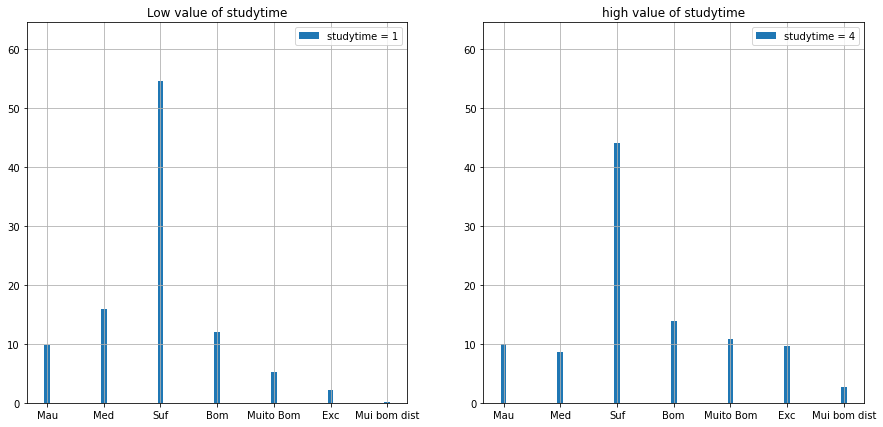

In [51]:
#--------Inference CPT representations--------

print("** Third case: \tAge between 20 and 22:\n")


#Inferences:
q3_1 = infer.query(["G3"],evidence={"studytime": 1})
q3_2 = infer.query(["G3"], evidence = {"studytime": 4})


#Print CPTs:
print(f"- CPT of studytime = 1:\n\n {q3_1}")
print(f"\n- CPT of studytime = 4:\n\n{q3_2}")



#------------Plotting the PDFs------------

#x axis ticklabels:
x_ticklabels = ["Mau",
                "Med", 
                "Suf",
                "Bom",
                "Muito Bom",
                "Exc",
                "Mui bom dist"]

#Setting y values of first dictionary:
diz1 = dict({"Bom": q3_1.values[0]*100,
             "Exc": q3_1.values[1]*100,
             "Mau": q3_1.values[2]*100,
             "Med": q3_1.values[3]*100,
             "Mui bom dist": q3_1.values[4]*100,
             "Muito Bom": q3_1.values[5]*100,
             "Suf": q3_1.values[6]*100
            })

#Reordering first dictionary:
diz1 = {k: diz1[k] for k in x_ticklabels}


#Setting y values of second dictionary:
diz2 = dict({"Bom": q3_2.values[0]*100,
             "Exc": q3_2.values[1]*100,
             "Mau": q3_2.values[2]*100,
             "Med": q3_2.values[3]*100,
             "Mui bom dist": q3_2.values[4]*100,
             "Muito Bom": q3_2.values[5]*100,
             "Suf": q3_2.values[6]*100
            })

#Reordering second dictionary:
diz2 = {k: diz2[k] for k in x_ticklabels}

#Variables to plot PDFs:
rows = 1
cols = 2
titles = ["Low value of studytime", "high value of studytime"]
pdf_legends = ['studytime = 1', 'studytime = 4']
figsize = (15,7)
diz = [diz1, diz2]


#plot all the pdf:
print("\nPDFs in percentage format:")
plot_pdf(rows = rows,
         cols = cols,
         titles = titles,
         pdf_legends = pdf_legends,
         figsize = figsize,
         x_ticklabels = x_ticklabels, 
         diz = diz)

* **What is the chance that a student receives <u>family support</u> given the <u>parental level of education</u>?**

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

- Case 1: 	Medu = 4 & Fedu = 4

 +-------------+---------------+
| famsup      |   phi(famsup) |
+=============+===============+
| famsup(no)  |        0.2427 |
+-------------+---------------+
| famsup(yes) |        0.7573 |
+-------------+---------------+


- Case 2: 	Medu = 1 & Fedu = 1

 +-------------+---------------+
| famsup      |   phi(famsup) |
+=============+===============+
| famsup(no)  |        0.4187 |
+-------------+---------------+
| famsup(yes) |        0.5813 |
+-------------+---------------+


- Case 3: 	Medu = 4 & Fedu = 1

 +-------------+---------------+
| famsup      |   phi(famsup) |
+=============+===============+
| famsup(no)  |        0.5543 |
+-------------+---------------+
| famsup(yes) |        0.4457 |
+-------------+---------------+


- Case 4: 	Medu = 1 & Fedu = 4

 +-------------+---------------+
| famsup      |   phi(famsup) |
+=============+===============+
| famsup(no)  |        0.3438 |
+-------------+---------------+
| famsup(yes) |        0.6562 

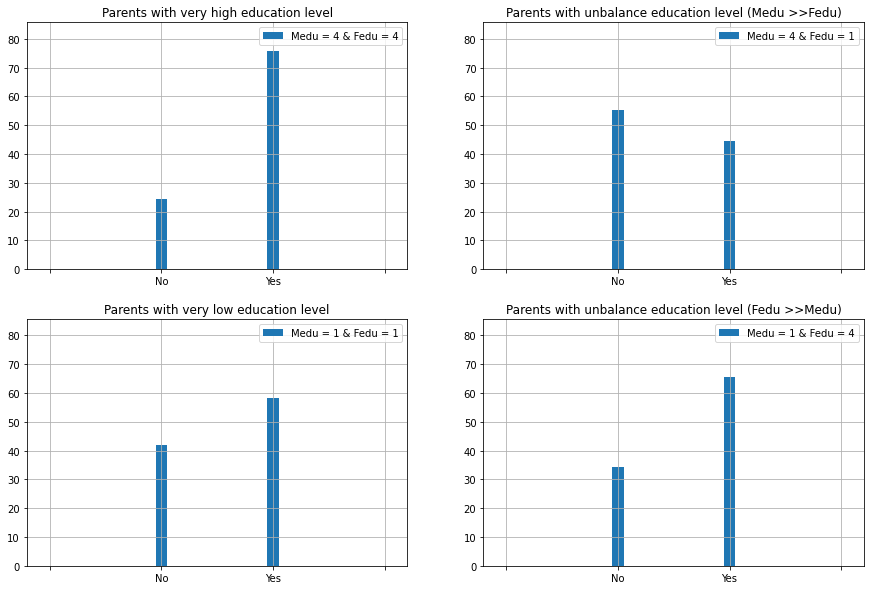

In [52]:
#--------Inference CPT representations--------

#Inferences:
q4_1 = infer.query(["famsup"], evidence={"Medu": 4,"Fedu": 4}) 
q4_2 = infer.query(["famsup"], evidence={"Medu": 1,"Fedu": 1})
q4_3 = infer.query(["famsup"], evidence={"Medu": 4,"Fedu": 1}) 
q4_4 = infer.query(["famsup"], evidence={"Medu": 1,"Fedu": 4})


#Print CPTs:
print(f"- Case 1: \tMedu = 4 & Fedu = 4\n\n {q4_1}")
print(f"\n\n- Case 2: \tMedu = 1 & Fedu = 1\n\n {q4_2}")
print(f"\n\n- Case 3: \tMedu = 4 & Fedu = 1\n\n {q4_3}")
print(f"\n\n- Case 4: \tMedu = 1 & Fedu = 4\n\n {q4_4}")



#------------Plotting the PDFs------------


#Setting y values of first dictionary:
diz1 = dict({" ": 0,
             "no": q4_1.values[0]*100,
             "yes": q4_1.values[1]*100,
             "": 0
            })


#Setting y values of second dictionary:
diz2 = dict({" ": 0,
             "no": q4_2.values[0]*100,
             "yes": q4_2.values[1]*100,
             "": 0
            })


#Setting y values of third dictionary:
diz3 = dict({" ": 0,
             "no": q4_3.values[0]*100,
             "yes": q4_3.values[1]*100,
             "": 0
            })


#Setting y values of fourth dictionary:
diz4 = dict({" ": 0,
             "no": q4_4.values[0]*100,
             "yes": q4_4.values[1]*100,
             "": 0
            })

#Variables to plot PDFs:
rows = 2
cols = 2
titles = ['Parents with very high education level',
          'Parents with very low education level',
          'Parents with unbalance education level (Medu >>Fedu)',
          'Parents with unbalance education level (Fedu >>Medu)'
         ]

pdf_legends = ['Medu = 4 & Fedu = 4', 
              'Medu = 1 & Fedu = 1', 
              'Medu = 4 & Fedu = 1', 
              'Medu = 1 & Fedu = 4',]

figsize = (15,10)
diz = [diz1, diz2, diz3, diz4]
x_ticklabels = [" ",
                "No", 
                "Yes",
                " "
               ]


#plot all the PDFs:
print("\nPDFs in percentage format:")
plot_pdf(rows = rows,
         cols = cols,
         titles = titles,
         pdf_legends = pdf_legends,
         figsize = figsize,
         x_ticklabels = x_ticklabels, 
         diz = diz)

<p id="query"></p>

### 5.1.2. Evidential Inference Queries

* **What is a student's <u>studytime</u> given his <u>final grade</u>?**

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

- Case 1: 	Final Grade = 'Mau'

 +--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.3674 |
+--------------+------------------+
| studytime(2) |           0.4635 |
+--------------+------------------+
| studytime(3) |           0.0710 |
+--------------+------------------+
| studytime(4) |           0.0981 |
+--------------+------------------+


- Case 2: 	Final Grade = 'Suficiente'

 +--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.3243 |
+--------------+------------------+
| studytime(2) |           0.4790 |
+--------------+------------------+
| studytime(3) |           0.1277 |
+--------------+------------------+
| studytime(4) |           0.0690 |
+--------------+------------------+


- Case 3: 	Final Grade = 'Mediocre'

 +--------------+------------------+
| studytime    |   phi(studytime) |
+==============+=====

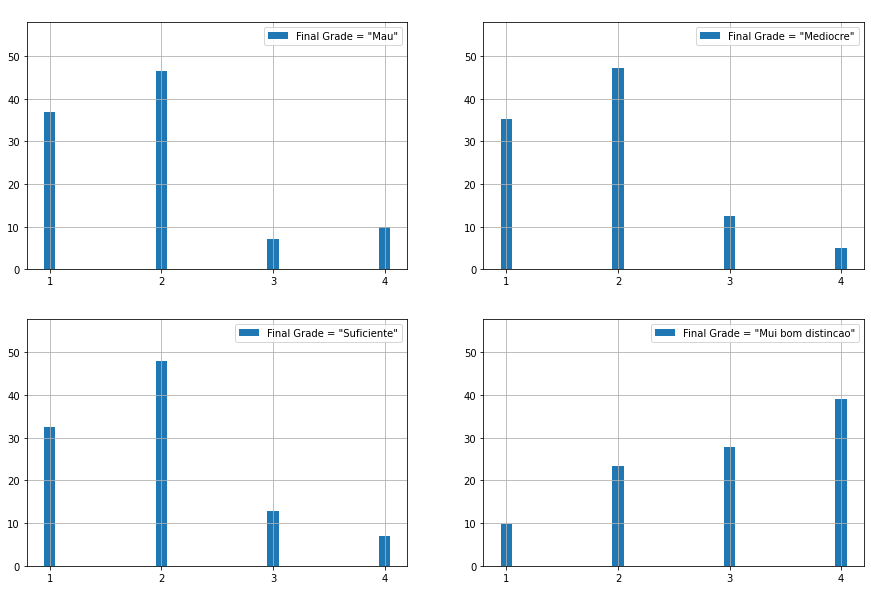

In [53]:
#--------Inference CPT representations--------


#Inferences:
q5_1 = infer.query(["studytime"],evidence={"G3": "Mau"})
q5_2 = infer.query(["studytime"],evidence={"G3": "Suficiente"})
q5_3 = infer.query(["studytime"],evidence={"G3": "Mediocre"})
q5_4 = infer.query(["studytime"],evidence={"G3": "Mui bom distincao"})


#Print CPTs:
print(f"- Case 1: \tFinal Grade = 'Mau'\n\n {q5_1}")
print(f"\n\n- Case 2: \tFinal Grade = 'Suficiente'\n\n {q5_2}")
print(f"\n\n- Case 3: \tFinal Grade = 'Mediocre'\n\n {q5_3}")
print(f"\n\n- Case 4: \tFinal Grade = 'Mui bom distincao'\n\n {q5_4}")



#------------Plotting the PDFs------------


#Setting y values of first dictionary:
diz1 = dict({1: q5_1.values[0]*100,
             2: q5_1.values[1]*100,
             3: q5_1.values[2]*100,
             4: q5_1.values[3]*100
            })


#Setting y values of second dictionary:
diz2 = dict({1: q5_2.values[0]*100,
             2: q5_2.values[1]*100,
             3: q5_2.values[2]*100,
             4: q5_2.values[3]*100
            })


#Setting y values of third dictionary:
diz3 = dict({1: q5_3.values[0]*100,
             2: q5_3.values[1]*100,
             3: q5_3.values[2]*100,
             4: q5_3.values[3]*100
            })


#Setting y values of fourth dictionary:
diz4 = dict({1: q5_4.values[0]*100,
             2: q5_4.values[1]*100,
             3: q5_4.values[2]*100,
             4: q5_4.values[3]*100
            })

#Variables to plot PDFs:
rows = 2
cols = 2
titles = [' ',
          ' ',
          ' ',
          ' '
         ]

pdf_legends = ['Final Grade = "Mau"',
               'Final Grade = "Suficiente"',
               'Final Grade = "Mediocre"',
               'Final Grade = "Mui bom distincao"']

figsize = (15,10)
diz = [diz1, diz2, diz3, diz4]
x_ticklabels = ['1',
                '2', 
                '3', 
                '4'
               ]


#plot all the PDFs:
print("\nPDFs in percentage format:")
plot_pdf(rows = rows,
         cols = cols,
         titles = titles,
         pdf_legends = pdf_legends,
         figsize = figsize,
         x_ticklabels = x_ticklabels, 
         diz = diz)

### 5.1.3. Intercausal Inference Queries

* **What is the chance that a student receives <u>family support</u> given <u>school support</u> and <u>studytime</u>?**

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

- Case 1: 	studytime = 1 & schoolsup = 'yes'

 +-------------+---------------+
| famsup      |   phi(famsup) |
+=============+===============+
| famsup(no)  |        0.2772 |
+-------------+---------------+
| famsup(yes) |        0.7228 |
+-------------+---------------+


- Case 2: 	studytime = 1 & schoolsup = 'no'

 +-------------+---------------+
| famsup      |   phi(famsup) |
+=============+===============+
| famsup(no)  |        0.5068 |
+-------------+---------------+
| famsup(yes) |        0.4932 |
+-------------+---------------+


- Case 3: 	studytime = 2 & schoolsup = 'yes'

 +-------------+---------------+
| famsup      |   phi(famsup) |
+=============+===============+
| famsup(no)  |        0.4607 |
+-------------+---------------+
| famsup(yes) |        0.5393 |
+-------------+---------------+


- Case 4: 	studytime = 2 & schoolsup = 'no'

 +-------------+---------------+
| famsup      |   phi(famsup) |
+=============+===============+
| famsup(no)  |        0.3582 |
+-------

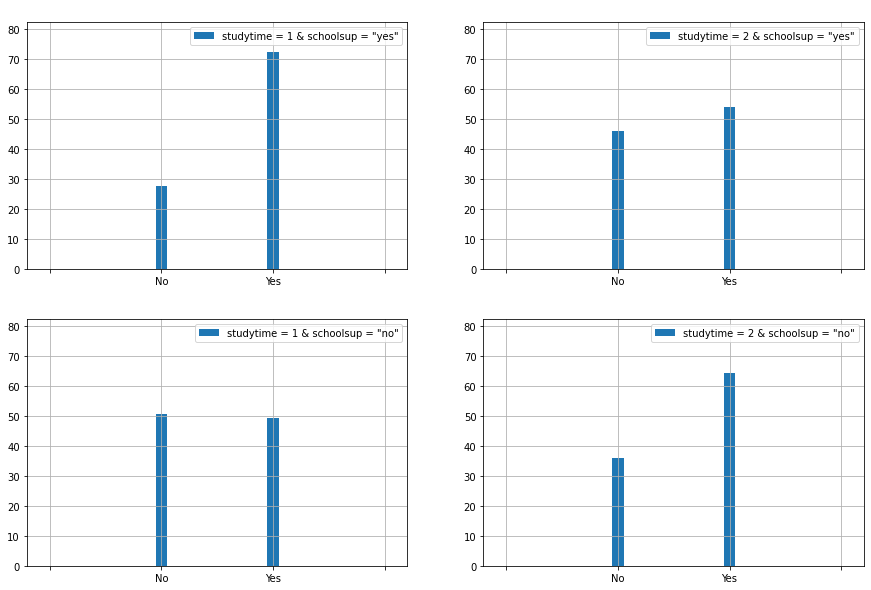

In [54]:
#--------Inference CPT representations--------

#Inferences:
q6_1 = infer.query(["famsup"], evidence={"studytime": 1,"schoolsup": 'yes'})
q6_2 = infer.query(["famsup"], evidence={"studytime": 1,"schoolsup": 'no'})
q6_3 = infer.query(["famsup"], evidence={"studytime": 2,"schoolsup": 'yes'})
q6_4 = infer.query(["famsup"], evidence={"studytime": 2,"schoolsup": 'no'})


#Print CPTs:
print(f"- Case 1: \tstudytime = 1 & schoolsup = 'yes'\n\n {q6_1}")
print(f"\n\n- Case 2: \tstudytime = 1 & schoolsup = 'no'\n\n {q6_2}")
print(f"\n\n- Case 3: \tstudytime = 2 & schoolsup = 'yes'\n\n {q6_3}")
print(f"\n\n- Case 4: \tstudytime = 2 & schoolsup = 'no'\n\n {q6_4}")



#------------Plotting the PDFs------------


#Setting y values of first dictionary:
diz1 = dict({"": 0,
             "no": q6_1.values[0]*100,
             "yes": q6_1.values[1]*100,
             " ": 0
            })


#Setting y values of second dictionary:
diz2 = dict({"": 0,
             "no": q6_2.values[0]*100,
             "yes": q6_2.values[1]*100,
             " ": 0
            })


#Setting y values of third dictionary:
diz3 = dict({"": 0,
             "no": q6_3.values[0]*100,
             "yes": q6_3.values[1]*100,
             " ": 0
            })


#Setting y values of fourth dictionary:
diz4 = dict({"": 0,
             "no": q6_4.values[0]*100,
             "yes": q6_4.values[1]*100,
             " ": 0
             
            })

#Variables to plot PDFs:
rows = 2
cols = 2
titles = [' ',
          ' ',
          ' ',
          ' '
         ]

pdf_legends = ['studytime = 1 & schoolsup = "yes"',
               'studytime = 1 & schoolsup = "no"',
               'studytime = 2 & schoolsup = "yes"',
               'studytime = 2 & schoolsup = "no"'
              ]

figsize = (15,10)
diz = [diz1, diz2, diz3, diz4]
x_ticklabels = [" ", 
                "No", 
                "Yes", 
                " "
               ]


#plot all the PDFs:
print("\nPDFs in percentage format:")
plot_pdf(rows = rows,
         cols = cols,
         titles = titles,
         pdf_legends = pdf_legends,
         figsize = figsize,
         x_ticklabels = x_ticklabels, 
         diz = diz)

* **What is the probability distribution of the <u>absences</u> given the <u>studytime</u> and the <u>final grade</u>?**

- Case 1: 	G3 = 'Suficiente' & studytime = 1

 +-----------------+-----------------+
| absences        |   phi(absences) |
+=================+=================+
| absences(+30)   |          0.0016 |
+-----------------+-----------------+
| absences(0-10)  |          0.9103 |
+-----------------+-----------------+
| absences(11-20) |          0.0798 |
+-----------------+-----------------+
| absences(21-30) |          0.0083 |
+-----------------+-----------------+


- Case 2: 	G3 = 'Suficiente' & studytime = 4

 +-----------------+-----------------+
| absences        |   phi(absences) |
+=================+=================+
| absences(+30)   |          0.0022 |
+-----------------+-----------------+
| absences(0-10)  |          0.9745 |
+-----------------+-----------------+
| absences(11-20) |          0.0176 |
+-----------------+-----------------+
| absences(21-30) |          0.0056 |
+-----------------+-----------------+


- Case 3: 	G3 = 'Excelente' & studytime = 1

 +-----------------+-

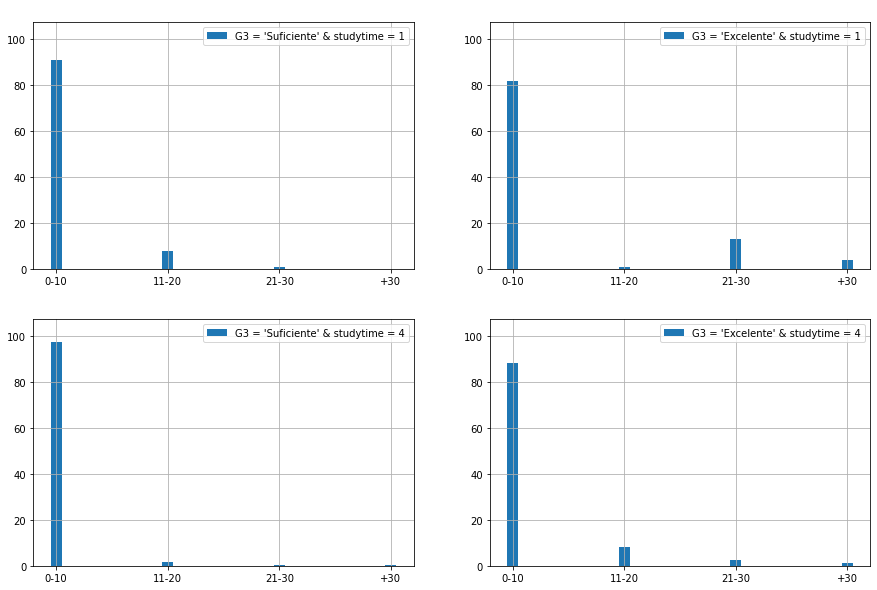

In [55]:
#--------Inference CPT representations--------

#Inferences:
q7_1 = infer.query(["absences"], evidence={"G3": 'Suficiente', "studytime": 1}, show_progress = False)
q7_2 = infer.query(["absences"], evidence={"G3": 'Suficiente', "studytime": 4}, show_progress = False)
q7_3 = infer.query(["absences"], evidence={"G3": 'Excelente', "studytime": 1}, show_progress = False)
q7_4 = infer.query(["absences"], evidence={"G3": 'Excelente', "studytime": 4}, show_progress = False)


#Print CPTs:
print(f"- Case 1: \tG3 = 'Suficiente' & studytime = 1\n\n {q7_1}")
print(f"\n\n- Case 2: \tG3 = 'Suficiente' & studytime = 4\n\n {q7_2}")
print(f"\n\n- Case 3: \tG3 = 'Excelente' & studytime = 1\n\n {q7_3}")
print(f"\n\n- Case 4: \tG3 = 'Excelente' & studytime = 4\n\n {q7_4}")



#------------Plotting the PDFs------------

#x axis tick labels:
x_ticklabels = ["0-10",
                "11-20", 
                "21-30", 
                "+30"
               ]

#Setting y values of first dictionary:
diz1 = dict({"+30" : q7_1.values[0]*100,
             "0-10" : q7_1.values[1]*100,
             "11-20" : q7_1.values[2]*100,
             "21-30" : q7_1.values[3]*100             
            })


#Reordering first dictionary:
diz1 = {k: diz1[k] for k in x_ticklabels}


#Setting y values of second dictionary:
diz2 = dict({"+30" : q7_2.values[0]*100,
             "0-10" : q7_2.values[1]*100,
             "11-20" : q7_2.values[2]*100,
             "21-30" : q7_2.values[3]*100             
            })


#Reordering first dictionary:
diz2 = {k: diz2[k] for k in x_ticklabels}


#Setting y values of third dictionary:
diz3 = dict({"+30" : q7_3.values[0]*100,
             "0-10" : q7_3.values[1]*100,
             "11-20" : q7_3.values[2]*100,
             "21-30" : q7_3.values[3]*100             
            })


#Reordering first dictionary:
diz3 = {k: diz3[k] for k in x_ticklabels}


#Setting y values of fourth dictionary:
diz4 = dict({"+30" : q7_4.values[0]*100,
             "0-10" : q7_4.values[1]*100,
             "11-20" : q7_4.values[2]*100,
             "21-30" : q7_4.values[3]*100             
            })
            

#Reordering first dictionary:
diz4 = {k: diz4[k] for k in x_ticklabels}

            
#Variables to plot PDFs:
rows = 2
cols = 2
titles = [' ',
          ' ',
          ' ',
          ' '
         ]

pdf_legends = ["G3 = 'Suficiente' & studytime = 1",
               "G3 = 'Suficiente' & studytime = 4",
               "G3 = 'Excelente' & studytime = 1",
               "G3 = 'Excelente' & studytime = 4"
              ]

figsize = (15,10)
diz = [diz1, diz2, diz3, diz4]

#plot all the PDFs:
print("\nPDFs in percentage format:")
plot_pdf(rows = rows,
         cols = cols,
         titles = titles,
         pdf_legends = pdf_legends,
         figsize = figsize,
         x_ticklabels = x_ticklabels, 
         diz = diz)

* **What is the probability distribution of <u>Dalc</u> given <u>studytime</u> and <u>famsup</u>?**

<p id="DalcQuery"></p>

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]



- Case 1: 	studytime = 1 & famsup = 'no'

 +---------+-------------+
| Dalc    |   phi(Dalc) |
+=========+=============+
| Dalc(1) |      0.5661 |
+---------+-------------+
| Dalc(2) |      0.2509 |
+---------+-------------+
| Dalc(3) |      0.1221 |
+---------+-------------+
| Dalc(4) |      0.0395 |
+---------+-------------+
| Dalc(5) |      0.0214 |
+---------+-------------+


- Case 2: 	studytime = 3 & famsup = 'yes'

 +---------+-------------+
| Dalc    |   phi(Dalc) |
+=========+=============+
| Dalc(1) |      0.7431 |
+---------+-------------+
| Dalc(2) |      0.1645 |
+---------+-------------+
| Dalc(3) |      0.0475 |
+---------+-------------+
| Dalc(4) |      0.0210 |
+---------+-------------+
| Dalc(5) |      0.0240 |
+---------+-------------+

PDFs in percentage format:


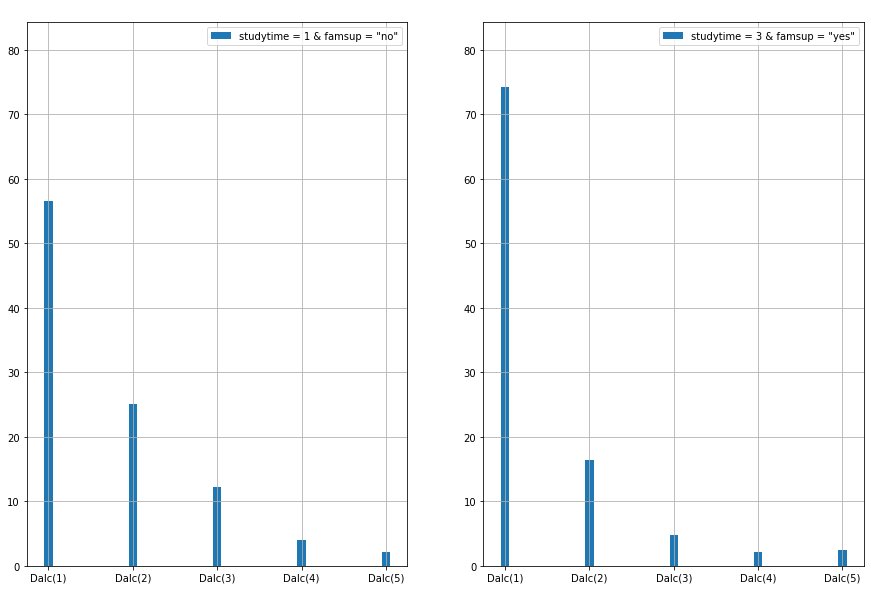

In [56]:
#--------Inference CPT representations--------

#Inferences:
q6_2 = infer.query(["Dalc"], evidence={"studytime": 1,"famsup": 'no'})
q6_3 = infer.query(["Dalc"], evidence={"studytime": 3,"famsup": 'yes'})



#Print CPTs:

print(f"\n\n- Case 1: \tstudytime = 1 & famsup = 'no'\n\n {q6_2}")
print(f"\n\n- Case 2: \tstudytime = 3 & famsup = 'yes'\n\n {q6_3}")


#------------Plotting the PDFs------------



#Setting y values of second dictionary:
diz2 = dict({"Dalc(1)": q6_2.values[0]*100,
             "Dalc(2)": q6_2.values[1]*100,
             "Dalc(3)": q6_2.values[2]*100,
             "Dalc(4)": q6_2.values[3]*100,
             "Dalc(5)": q6_2.values[4]*100,
            })


#Setting y values of third dictionary:
diz3 = dict({"Dalc(1)": q6_3.values[0]*100,
             "Dalc(2)": q6_3.values[1]*100,
             "Dalc(3)": q6_3.values[2]*100,
             "Dalc(4)": q6_3.values[3]*100,
             "Dalc(5)": q6_3.values[4]*100,
            })



#Variables to plot PDFs:
rows = 1
cols = 2
titles = [' ',
          ' ',
          ' ',
          ' '
         ]

pdf_legends = [
               'studytime = 1 & famsup = "no"',
               'studytime = 3 & famsup = "yes"',
              ]

figsize = (15,10)
diz = [ diz2, diz3]
x_ticklabels = [
                 "Dalc(1)",
                 "Dalc(2)",
                 "Dalc(3)",
                 "Dalc(4)",
                 "Dalc(5)"
               ]


#plot all the PDFs:
print("\nPDFs in percentage format:")
plot_pdf(rows = rows,
         cols = cols,
         titles = titles,
         pdf_legends = pdf_legends,
         figsize = figsize,
         x_ticklabels = x_ticklabels, 
         diz = diz)

### 5.2. Approximate Inference

As we said above, exact inference is not the only way to compute inference queries, but sometimes it is advisable to compute an approximate result by considering only a restricted number of samples. As a matter of fact, the more samples we consider, the more accurate the result will be. 

In the following we will consider some of the previous queries, but this time we will compute the *Probability Density Functions* by using approximate inference.  

In [57]:
from pgmpy.inference import ApproxInference

approx_infer = ApproxInference(model)

samples_num = range(44, 1045, 100)    #[44, 144, 244,..., 944, 1044] (total of df_new's rows)

#### 5.2.1. Causal Inference Queries

* What is the chance that a student receives <u>family support</u> given the <u>parental level of education</u>?

In [58]:
#variables:
query_variable = 'famsup'
evidence_variables = dict({"Medu": 4,"Fedu": 4})

#Approximate inference:
for i in samples_num:
    q = approx_infer.query(query_variable, 
                           i, 
                           evidence_variables,
                           show_progress = False)
    
    print(f'\n\nConditional Probability Table of variable "{query_variable}" given that "{evidence_variables}" are observed:')
    print(f'\nNumber of samples used to compute the approximate inference:\t{i}')
    print(f'\nConditional Probability Table:\n\t{q}')    



Conditional Probability Table of variable "famsup" given that "{'Medu': 4, 'Fedu': 4}" are observed:

Number of samples used to compute the approximate inference:	44

Conditional Probability Table:
	+-------------+---------------+
| famsup      |   phi(famsup) |
+=============+===============+
| famsup(no)  |        0.1591 |
+-------------+---------------+
| famsup(yes) |        0.8409 |
+-------------+---------------+


Conditional Probability Table of variable "famsup" given that "{'Medu': 4, 'Fedu': 4}" are observed:

Number of samples used to compute the approximate inference:	144

Conditional Probability Table:
	+-------------+---------------+
| famsup      |   phi(famsup) |
+=============+===============+
| famsup(no)  |        0.2431 |
+-------------+---------------+
| famsup(yes) |        0.7569 |
+-------------+---------------+


Conditional Probability Table of variable "famsup" given that "{'Medu': 4, 'Fedu': 4}" are observed:

Number of samples used to compute the approxi

### 5.2.2. Intercausal Inference Queries

* What is the probability distribution of the <u>absences</u> given the <u>studytime</u> and the <u>final grade</u>?

In [59]:
#variables:
query_variable = 'absences'
evidence_variables = dict({"G3": 'Suficiente', "studytime": 1})

#Approximate inference:
for i in samples_num:
    q = approx_infer.query([query_variable], 
                            i, 
                            evidence_variables)
    
    print(f'Conditional Probability Table of variable "{query_variable}" given that "{evidence_variables}" are observed:')
    print(f'\n\tNumber of samples used to compute the approximate inference:\t{i}')
    print(f'\n\tConditional Probability Table:\n\t{q}')    

  0%|          | 0/44 [00:00<?, ?it/s]

Conditional Probability Table of variable "absences" given that "{'G3': 'Suficiente', 'studytime': 1}" are observed:

	Number of samples used to compute the approximate inference:	44

	Conditional Probability Table:
	+-----------------+-----------------+
| absences        |   phi(absences) |
+=================+=================+
| absences(+30)   |          0.0227 |
+-----------------+-----------------+
| absences(0-10)  |          0.8636 |
+-----------------+-----------------+
| absences(11-20) |          0.1136 |
+-----------------+-----------------+


  0%|          | 0/144 [00:00<?, ?it/s]

Conditional Probability Table of variable "absences" given that "{'G3': 'Suficiente', 'studytime': 1}" are observed:

	Number of samples used to compute the approximate inference:	144

	Conditional Probability Table:
	+-----------------+-----------------+
| absences        |   phi(absences) |
+=================+=================+
| absences(0-10)  |          0.9028 |
+-----------------+-----------------+
| absences(11-20) |          0.0764 |
+-----------------+-----------------+
| absences(21-30) |          0.0208 |
+-----------------+-----------------+


  0%|          | 0/244 [00:00<?, ?it/s]

Conditional Probability Table of variable "absences" given that "{'G3': 'Suficiente', 'studytime': 1}" are observed:

	Number of samples used to compute the approximate inference:	244

	Conditional Probability Table:
	+-----------------+-----------------+
| absences        |   phi(absences) |
+=================+=================+
| absences(0-10)  |          0.9098 |
+-----------------+-----------------+
| absences(11-20) |          0.0697 |
+-----------------+-----------------+
| absences(21-30) |          0.0205 |
+-----------------+-----------------+


  0%|          | 0/344 [00:00<?, ?it/s]

Conditional Probability Table of variable "absences" given that "{'G3': 'Suficiente', 'studytime': 1}" are observed:

	Number of samples used to compute the approximate inference:	344

	Conditional Probability Table:
	+-----------------+-----------------+
| absences        |   phi(absences) |
+=================+=================+
| absences(+30)   |          0.0029 |
+-----------------+-----------------+
| absences(0-10)  |          0.9244 |
+-----------------+-----------------+
| absences(11-20) |          0.0698 |
+-----------------+-----------------+
| absences(21-30) |          0.0029 |
+-----------------+-----------------+


  0%|          | 0/444 [00:00<?, ?it/s]

Conditional Probability Table of variable "absences" given that "{'G3': 'Suficiente', 'studytime': 1}" are observed:

	Number of samples used to compute the approximate inference:	444

	Conditional Probability Table:
	+-----------------+-----------------+
| absences        |   phi(absences) |
+=================+=================+
| absences(0-10)  |          0.9009 |
+-----------------+-----------------+
| absences(11-20) |          0.0946 |
+-----------------+-----------------+
| absences(21-30) |          0.0045 |
+-----------------+-----------------+


  0%|          | 0/544 [00:00<?, ?it/s]

Conditional Probability Table of variable "absences" given that "{'G3': 'Suficiente', 'studytime': 1}" are observed:

	Number of samples used to compute the approximate inference:	544

	Conditional Probability Table:
	+-----------------+-----------------+
| absences        |   phi(absences) |
+=================+=================+
| absences(0-10)  |          0.9191 |
+-----------------+-----------------+
| absences(11-20) |          0.0662 |
+-----------------+-----------------+
| absences(21-30) |          0.0147 |
+-----------------+-----------------+


  0%|          | 0/644 [00:00<?, ?it/s]

Conditional Probability Table of variable "absences" given that "{'G3': 'Suficiente', 'studytime': 1}" are observed:

	Number of samples used to compute the approximate inference:	644

	Conditional Probability Table:
	+-----------------+-----------------+
| absences        |   phi(absences) |
+=================+=================+
| absences(0-10)  |          0.9224 |
+-----------------+-----------------+
| absences(11-20) |          0.0683 |
+-----------------+-----------------+
| absences(21-30) |          0.0093 |
+-----------------+-----------------+


  0%|          | 0/744 [00:00<?, ?it/s]

Conditional Probability Table of variable "absences" given that "{'G3': 'Suficiente', 'studytime': 1}" are observed:

	Number of samples used to compute the approximate inference:	744

	Conditional Probability Table:
	+-----------------+-----------------+
| absences        |   phi(absences) |
+=================+=================+
| absences(0-10)  |          0.9288 |
+-----------------+-----------------+
| absences(11-20) |          0.0632 |
+-----------------+-----------------+
| absences(21-30) |          0.0081 |
+-----------------+-----------------+


  0%|          | 0/844 [00:00<?, ?it/s]

Conditional Probability Table of variable "absences" given that "{'G3': 'Suficiente', 'studytime': 1}" are observed:

	Number of samples used to compute the approximate inference:	844

	Conditional Probability Table:
	+-----------------+-----------------+
| absences        |   phi(absences) |
+=================+=================+
| absences(+30)   |          0.0012 |
+-----------------+-----------------+
| absences(0-10)  |          0.9052 |
+-----------------+-----------------+
| absences(11-20) |          0.0865 |
+-----------------+-----------------+
| absences(21-30) |          0.0071 |
+-----------------+-----------------+


  0%|          | 0/944 [00:00<?, ?it/s]

Conditional Probability Table of variable "absences" given that "{'G3': 'Suficiente', 'studytime': 1}" are observed:

	Number of samples used to compute the approximate inference:	944

	Conditional Probability Table:
	+-----------------+-----------------+
| absences        |   phi(absences) |
+=================+=================+
| absences(+30)   |          0.0011 |
+-----------------+-----------------+
| absences(0-10)  |          0.9100 |
+-----------------+-----------------+
| absences(11-20) |          0.0826 |
+-----------------+-----------------+
| absences(21-30) |          0.0064 |
+-----------------+-----------------+


  0%|          | 0/1044 [00:00<?, ?it/s]

Conditional Probability Table of variable "absences" given that "{'G3': 'Suficiente', 'studytime': 1}" are observed:

	Number of samples used to compute the approximate inference:	1044

	Conditional Probability Table:
	+-----------------+-----------------+
| absences        |   phi(absences) |
+=================+=================+
| absences(+30)   |          0.0019 |
+-----------------+-----------------+
| absences(0-10)  |          0.8946 |
+-----------------+-----------------+
| absences(11-20) |          0.0929 |
+-----------------+-----------------+
| absences(21-30) |          0.0105 |
+-----------------+-----------------+


### 5.2.3 Evidential Inference Queries

* What is a student's <u>studytime</u> given his <u>final grade</u>?

In [60]:
#variables:
query_variable = 'studytime'
evidence_variables = dict({"G3": "Suficiente"})

#Approximate inference:
for i in samples_num:
    q = approx_infer.query([query_variable], 
                            i, 
                            evidence_variables)
    
    print(f'Conditional Probability Table of variable "{query_variable}" given that "{evidence_variables}" are observed:')
    print(f'\n\tNumber of samples used to compute the approximate inference:\t{i}')
    print(f'\n\tConditional Probability Table:\n\t{q}') 

  0%|          | 0/44 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	44

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.4318 |
+--------------+------------------+
| studytime(2) |           0.4545 |
+--------------+------------------+
| studytime(3) |           0.0909 |
+--------------+------------------+
| studytime(4) |           0.0227 |
+--------------+------------------+


  0%|          | 0/144 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	144

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.3819 |
+--------------+------------------+
| studytime(2) |           0.4514 |
+--------------+------------------+
| studytime(3) |           0.0833 |
+--------------+------------------+
| studytime(4) |           0.0833 |
+--------------+------------------+


  0%|          | 0/244 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	244

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.2869 |
+--------------+------------------+
| studytime(2) |           0.5246 |
+--------------+------------------+
| studytime(3) |           0.1107 |
+--------------+------------------+
| studytime(4) |           0.0779 |
+--------------+------------------+


  0%|          | 0/344 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	344

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.3169 |
+--------------+------------------+
| studytime(2) |           0.5029 |
+--------------+------------------+
| studytime(3) |           0.0988 |
+--------------+------------------+
| studytime(4) |           0.0814 |
+--------------+------------------+


  0%|          | 0/444 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	444

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.2860 |
+--------------+------------------+
| studytime(2) |           0.5360 |
+--------------+------------------+
| studytime(3) |           0.1216 |
+--------------+------------------+
| studytime(4) |           0.0563 |
+--------------+------------------+


  0%|          | 0/544 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	544

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.3162 |
+--------------+------------------+
| studytime(2) |           0.4816 |
+--------------+------------------+
| studytime(3) |           0.1342 |
+--------------+------------------+
| studytime(4) |           0.0680 |
+--------------+------------------+


  0%|          | 0/644 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	644

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.3525 |
+--------------+------------------+
| studytime(2) |           0.4472 |
+--------------+------------------+
| studytime(3) |           0.1242 |
+--------------+------------------+
| studytime(4) |           0.0761 |
+--------------+------------------+


  0%|          | 0/744 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	744

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.3051 |
+--------------+------------------+
| studytime(2) |           0.5027 |
+--------------+------------------+
| studytime(3) |           0.1290 |
+--------------+------------------+
| studytime(4) |           0.0632 |
+--------------+------------------+


  0%|          | 0/844 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	844

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.3246 |
+--------------+------------------+
| studytime(2) |           0.4716 |
+--------------+------------------+
| studytime(3) |           0.1398 |
+--------------+------------------+
| studytime(4) |           0.0640 |
+--------------+------------------+


  0%|          | 0/944 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	944

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.3316 |
+--------------+------------------+
| studytime(2) |           0.4788 |
+--------------+------------------+
| studytime(3) |           0.1314 |
+--------------+------------------+
| studytime(4) |           0.0583 |
+--------------+------------------+


  0%|          | 0/1044 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	1044

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.3372 |
+--------------+------------------+
| studytime(2) |           0.4693 |
+--------------+------------------+
| studytime(3) |           0.1207 |
+--------------+------------------+
| studytime(4) |           0.0728 |
+--------------+------------------+


In [61]:
#variables:
query_variable = 'studytime'
evidence_variables = dict({"G3": "Suficiente"})

#Approximate inference:
for i in [100,200,300]:
    q = approx_infer.query([query_variable], 
                            i, 
                            evidence_variables)
    
    print(f'Conditional Probability Table of variable "{query_variable}" given that "{evidence_variables}" are observed:')
    print(f'\n\tNumber of samples used to compute the approximate inference:\t{i}')
    print(f'\n\tConditional Probability Table:\n\t{q}') 

  0%|          | 0/100 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	100

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.3400 |
+--------------+------------------+
| studytime(2) |           0.4600 |
+--------------+------------------+
| studytime(3) |           0.1700 |
+--------------+------------------+
| studytime(4) |           0.0300 |
+--------------+------------------+


  0%|          | 0/200 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	200

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.3600 |
+--------------+------------------+
| studytime(2) |           0.4300 |
+--------------+------------------+
| studytime(3) |           0.1450 |
+--------------+------------------+
| studytime(4) |           0.0650 |
+--------------+------------------+


  0%|          | 0/300 [00:00<?, ?it/s]

Conditional Probability Table of variable "studytime" given that "{'G3': 'Suficiente'}" are observed:

	Number of samples used to compute the approximate inference:	300

	Conditional Probability Table:
	+--------------+------------------+
| studytime    |   phi(studytime) |
+==============+==================+
| studytime(1) |           0.3300 |
+--------------+------------------+
| studytime(2) |           0.4633 |
+--------------+------------------+
| studytime(3) |           0.1400 |
+--------------+------------------+
| studytime(4) |           0.0667 |
+--------------+------------------+


## 6. Conclusions 


What can be inferred from our Bayesian model is that the feature that most affects a student's grade (`G3`) is the amount of `studytime`. As we can see in <a href="#query"><u>*this query*</u></a>, if the value of `studytime` is low, then the grades below 'sufficient' have higher probabilities and inversively the grades above 'sufficient' have lower probabilities, all w.r.t. the case of high value of `studytime`. 

Another noteworthy consideration involves the student's alcohol consumption that, as we can see in <a href = "#DalcQuery"><u>*this query*</u></a>, when `studytime` has a low value (e.g. when `studytime = 1`), we can observe in the *pdf* plot that the probability of high alcohol consumptions (e.g. `Dalc = 3` and `Dalc=4`) are higher w.r.t. the case where `studytime` has a high value (`studytime = 3`). Unexpectedly, in the case of `studytime = 3`, we can see an increment in the probability of high alcohol consuption (e.g when `Dalc(5)`). 

In conclusion, we can say that drinking to much alcohol negatively affects the amount of studytime and consequently the final grade. Although studying too much corresponds to the risk of higher consumption of alcohol due to mental health issues, or at list this is what we would like to think.


## 7. Bibliography

- https://degree.lamar.edu/articles/undergraduate/parents-education-level-and-childrens-success/
- https://www.brookings.edu/blog/up-front/2021/01/12/the-unreported-gender-gap-in-high-school-graduation-rates/
- https://hbr.org/2018/06/how-working-parents-can-manage-the-demands-of-school-age-kids
- https://www.scholaro.com/db/Countries/Portugal/Grading-System